# Modelo de Previsão de Retenção de Clientes

<center><img src="Cancel-bro.png" width="500" height="500"></center>

O desafio do churn é uma questão recorrente para as empresas de telecomunicações, especialmente em um mercado tão competitivo, onde a alta taxa de troca de serviços entre os clientes é comum. A indústria de telecomunicações investe consideráveis recursos para reduzir o churn. Estudos revelam que os custos associados à aquisição de novos clientes superam os de manter os já existentes. Portanto, é imperativo estar atento e identificar os sinais de alerta de churn para prevenir a saída dos clientes ativos.

Com isso em mente, a operadora de telecomunicações Interconnect gostaria de aprimorar a retenção de clientes e ser capaz de predizer a rotatividade deles, para aplicar estratégias de retenção eficientes.  No âmbito deste projeto, realizei uma análise abrangente dos dados de churn, fornecendo insights acionáveis ao Chief Marketing Officer (CMO). Ao longo dessa análise, concentrei-me em diversos aspectos, abrangendo desde a demografia dos clientes até os padrões de utilização de serviços, com o objetivo de identificar oportunidades significativas para aprimoramentos.

## Plano geral de resolução da tarefa


* **Conhecimento de negócio:** 

    * Nesta etapa procurei saber mais sobre o churn nas empresas de telecomunicação. 

* **Pré-processamento dos dados:**

    * Tratar os valores ausentes, decidindo se é necessário preenchê-los ou removê-los, com base na quantidade de dados faltantes e na relevância das variáveis.

    * Realizar a codificação de variáveis categóricas em formato numérico para que possam ser usadas nos modelos de aprendizado de máquina.

* **Análise exploratória de dados:**

    * Realizar uma análise detalhada dos dados fornecidos, incluindo a compreensão das variáveis, identificação de valores ausentes, tratamento de inconsistências e identificação de padrões e tendências nos dados.

    * Realizar visualizações gráficas e estatísticas descritivas para obter insights sobre os clientes, suas características e comportamentos.

* **Feature engineering:**

    * Realizar transformações nas variáveis existentes, se necessário, para melhorar sua representação e relevância para os modelos.

    * Criar novas variáveis com base no conhecimento do domínio, se aplicável, para fornecer mais informações úteis para a modelagem.

* **Modelagem:**

    * Dividir os dados em conjuntos de treinamento e teste para avaliação dos modelos.

    * Corrigir desbalanço de classes de churn, caso exista. 

    * Selecionar RandomForest, XGBoost, Logistic Regression, CatBoost e DecisionTree como um conjunto de modelos para resolver o problema de classificação de churn.

    * Definir os hiperparâmetros para cada modelo e realizar treinamento usando o conjunto de treinamento.

    * Avaliar a performance de cada modelo usando métricas adequadas e técnicas de validação cruzada para obter estimativas mais robustas.

        * Accuracy (Precisão): É uma métrica simples que mede a taxa de classificações corretas em relação ao total de classificações. É adequada quando as classes estão bem balanceadas no conjunto de dados.

        * F1-Score: É uma métrica que considera tanto a precisão quanto a especificidade. É útil quando há um desequilíbrio entre as classes de churn e não-churn. O F1-Score fornece uma medida balanceada entre a precisão e a capacidade do modelo de identificar corretamente os casos positivos.

        * AUC-ROC: É uma métrica que avalia a capacidade do modelo de distinguir entre as classes positivas e negativas. É especialmente útil quando há um desequilíbrio entre as classes e quando é necessário ter um baixo número de falsos positivos ou falsos negativos.

* **Escolha do melhor modelo:**

    * Comparar as métricas de avaliação dos modelos e selecionar o modelo que apresentar o melhor desempenho geral.

    * Levar em consideração o equilíbrio entre precisão e recall (F1-Score) e a capacidade do modelo de distinguir entre as classes positivas e negativas (AUC-ROC).

* **Análise dos resultados e interpretação:**

    * Realizar uma análise dos resultados obtidos, considerando as características dos clientes, clusters identificados, padrões de churn.

    * Extrair insights possam ser aplicados na tomada de decisões estratégicas para reduzir o churn, melhorar a satisfação do cliente e otimizar as estratégias de marketing.






## Primeiras impressões do conjunto de dodos

### Import e instalação das bibliotecas necessárias

In [1]:
# pip install imblearn

In [2]:
#pip install shap

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as date

import scipy.stats as st

import regex as re

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, auc, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


import xgboost as xgb

import shap
from sklearn.compose import ColumnTransformer

from catboost import CatBoostClassifier

from imblearn.over_sampling import ADASYN


from imblearn.pipeline import Pipeline 

from tqdm import tqdm


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


### Padronizando estilo dos gráficos

In [4]:
# Estilo dos gráficos
sns.set_style('whitegrid', rc={'grid.linestyle': ':'})
sns.set_palette(["#00004d", "#0047ab", "#26619c", "#89cff0"])

### Leitura dos arquivos .csv

In [5]:
data_contract = pd.read_csv('contract.csv')

data_internet = pd.read_csv('internet.csv')

data_personal = pd.read_csv('personal.csv')

data_phone = pd.read_csv('phone.csv')

In [6]:
data_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [7]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [8]:
data_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [9]:
data_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


### Unindo os dataframes

In [10]:
df_telecom = pd.merge(data_contract, data_personal, on='customerID', how='left')
df_telecom = pd.merge(df_telecom, data_internet, on='customerID', how='left')
df_telecom = pd.merge(df_telecom, data_phone, on='customerID', how='left')

In [11]:
df_telecom.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5,Female,0,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,Male,0,No,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9,Female,0,No,No,DSL,Yes,No,No,No,No,No,NaN
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05,Female,0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95,Male,0,No,Yes,DSL,Yes,Yes,No,No,No,No,No


In [12]:
# Formato do dataframe
print(f'Número de linhas: {df_telecom.shape[0]}')
print(f'Número de colunas: {df_telecom.shape[1]}')

Número de linhas: 7043
Número de colunas: 20


In [13]:
# Tipos de variáveis
df_telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


In [14]:
print(f'impacto dos valores ausentes no dataframe:\n{df_telecom.isna().mean()*100}')

impacto dos valores ausentes no dataframe:
customerID           0.000000
BeginDate            0.000000
EndDate              0.000000
Type                 0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.000000
gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
InternetService     21.666903
OnlineSecurity      21.666903
OnlineBackup        21.666903
DeviceProtection    21.666903
TechSupport         21.666903
StreamingTV         21.666903
StreamingMovies     21.666903
MultipleLines        9.683374
dtype: float64


In [15]:
df_telecom.describe()

,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000
mean,64.761692,0.162147
std,30.090047,0.368612
min,18.250000,0.000000
25%,35.500000,0.000000
50%,70.350000,0.000000
75%,89.850000,0.000000
max,118.750000,1.000000


In [16]:
df_telecom['EndDate'].value_counts()

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: EndDate, dtype: int64

* O dataframe possui 7043 observações com 20 variáveis incluindo a variável que armazena o target (não-churn).

* Valores ausentes correspondem a clientes que não contrataram serviços de internet e múltiplas linhas na telefonia fixa.
    * Há valores ausentes nos dados. As colunas que armazenam os tipos de serviços de internet ('InternetService', 'OnlineSecurity', 'OnlineBackup' 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies') e telefonia fixa com múltiplas linhas ('MultipleLines'). Isso se deve, provavelmente ao merge dos dataframes, onde não foi encontrado o 'customerID' do cliente na tabela à esquerda.

* Com relação as variáveis categoricas temos que:
    * Ambas contem 7043 observaçoes.
    * A Cobrança mensal é bastante dispersa com média e mediana distantes e devio padrão alto. Os valores mínimo e máximo mostram que pode haver valores atípicos.

* As classe de churn e não-churn parecem desbalanceadas.

* Abaixo apresento um quadro resumo de cada variável e sua descrição:

| Variável          | Descrição                                           |
|-------------------|-----------------------------------------------------|
| customerID        | Identificador único codificado para cada cliente     |
| BeginDate         | Data de início do contrato                           |
| EndDate           | Se o cliente cancelou ou não o contrato. Dois tipos de observações:<br>'No' - corresponde a clientes que permaneceram com um contrato ativo<br>Data - a data em que o cliente deixou a empresa |
| Type              | Tipo de contrato:<br>Month-to-month - Pagamento mensal<br>One year - Contrato de 1 ano<br>Two year - Contrato de 2 anos |
| PaperlessBilling  | Se o cliente possui fatura sem papel                 |
| PaymentMethod     | Método de pagamento:<br>Electronic check<br>Mailed check<br>Bank transfer (automatic)<br>Credit card (automatic) |
| MonthlyCharges    | Valor da cobrança mensal                            |
| TotalCharges      | Valor total pago pelo serviço                        |
| gender            | Gênero (Feminino ou Masculino)                       |
| SeniorCitizen     | Se o cliente é idoso                                |
| Partner           | Se o cliente possui um parceiro                      |
| Dependents        | Se o cliente possui dependentes                      |
| InternetService   | Tipo de serviço de internet:<br>DSL - Linha de assinante digital<br>Cabo de fibra óptica |
| OnlineSecurity    | Proteção online (software antivírus)                 |
| OnlineBackup      | Armazenamento de arquivos online e backup de dados    |
| DeviceProtection  | Proteção do dispositivo (bloqueador de sites maliciosos) |
| TechSupport       | Suporte técnico dedicado                            |
| StreamingTV       | Streaming de TV                                     |
| StreamingMovies   | Acesso a um diretório de filmes                      |
| MultipleLines     | Se o plano de telefone fixo permite várias linhas ao mesmo tempo |


## Pré-processamento dos Dados

### Criando cópia do dataframe original

In [17]:
telecom_copy = df_telecom.copy()

In [18]:
telecom_copy.head(10)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
5,9305-CDSKC,2019-03-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,99.65,820.5,Female,0,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
6,1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,Male,0,No,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes
7,6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,301.9,Female,0,No,No,DSL,Yes,No,No,No,No,No,NaN
8,7892-POOKP,2017-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,104.80,3046.05,Female,0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes
9,6388-TABGU,2014-12-01,No,One year,No,Bank transfer (automatic),56.15,3487.95,Male,0,No,Yes,DSL,Yes,Yes,No,No,No,No,No


### Corrigindo tipagem dos dados

In [19]:
#Corrigindo o tipo de variável da coluna 'BeginDate'
telecom_copy['BeginDate'] = pd.to_datetime(telecom_copy['BeginDate'])
telecom_copy['BeginDate'].dtype

dtype('<M8[ns]')

In [20]:
#Corrigindo o tipo de variável da coluna 'EndDate'
telecom_copy['EndDate'] = pd.to_datetime(telecom_copy['EndDate'], errors='coerce')
telecom_copy['EndDate'].dtype

dtype('<M8[ns]')

In [21]:
#Corrigindo o tipo de variável da coluna 'TotalCharges'
# A coluna não possui valores ausentes, porém alguns valores continham uma string vazia ' '
telecom_copy['TotalCharges'] = pd.to_numeric(telecom_copy['TotalCharges'], errors='coerce')
telecom_copy['TotalCharges'].dtype

dtype('float64')

### Tratando valores ausentes

Para corrigir os valores ausentes da coluna 'TotalCharges' eu irei proceder os seguintes passos:

1. Encontrar a última data de consulta ao banco de dados através da data mais recente na tabela 
2. Encontrando a última data de consulta irei calcular o tempo de contrato em meses até o momento dos clientes ativo
3. Irei preencher os valores ausentes em TotalCharges com o produto tempo de contrato * MonthlyCharges

In [22]:
# Data mais recente no dataset que representa a data em que os dados foram coletados
print(telecom_copy['BeginDate'].max())
print(telecom_copy['EndDate'].max())

2020-02-01 00:00:00
2020-01-01 00:00:00


In [23]:
# Armazenando data mais recente na variável
data_coleta = telecom_copy['BeginDate'].max()

In [24]:
# Calculando tempo de contrato para os clientes inativos
telecom_copy['ContractMonths'] = ((telecom_copy['EndDate'] - telecom_copy['BeginDate']).dt.days) / 30

In [25]:
# Para os clientes ativos irei calcular o tempo de contrato com a data da coleta
telecom_copy['ContractMonths'] = ((data_coleta - telecom_copy['BeginDate']).dt.days) / 30


In [26]:
# Agora com o tempo de contrato que os clientes ativos possuiam até o momento da coleta irei calcular o gasto total
telecom_copy['TotalCharges'] = telecom_copy['TotalCharges'].fillna(telecom_copy['ContractMonths'] * telecom_copy['MonthlyCharges'])

In [27]:
# Verificando se ainda há valores ausentes
telecom_copy['TotalCharges'].isna().sum()

0

In [28]:
# Preenchendo os valores ausentes das colunas de serviço de internet com 'não contratado'
telecom_copy['InternetService'].fillna('not contracted', inplace=True)
# Verificando resultado
telecom_copy['InternetService'].isna().sum()

0

In [29]:
# Preenchendo os valores ausentes das colunas de múltiplas linhas com 'não contratado'
telecom_copy['MultipleLines'].fillna('No', inplace=True)
# Verificando resultado
telecom_copy['MultipleLines'].isna().sum()

0

In [30]:
# Preenchendo as colunas com serviços de internet com 'não se aplica', uma vez que o serviço de internet não foi contratado
cols_to_fill = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in cols_to_fill:
    telecom_copy[col].fillna('not apply', inplace=True)
telecom_copy[cols_to_fill].isna().sum()

OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

### Padronizando nome das variáveis

In [31]:
# Passando a nomeclatura das variáveis para snake_case
def camel_to_snake(column_name):
    # A coluna já está no formato desejado?
    if re.search(r'^[a-z][a-zA-Z0-9]*$', column_name):
        return column_name
    
    # Usando regex para localizar todas as letras maiúsculas seguidas por zero ou mais letras minúsculas ou dígitos
    words = re.findall('[A-Z][a-z0-9]*', column_name)
    
    snake_case = '_'.join([word.lower() for word in words])
    
    return snake_case

In [32]:
telecom_copy.columns = [camel_to_snake(col) for col in telecom_copy.columns]
telecom_copy.columns

Index(['customerID', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'gender',
       'senior_citizen', 'partner', 'dependents', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_t_v', 'streaming_movies', 'multiple_lines',
       'contract_months'],
      dtype='object')

In [33]:
telecom_copy.rename(columns={'customerID' : 'customer_id'}, inplace=True)
telecom_copy.rename(columns={'streaming_t_v' : 'streaming_tv'}, inplace=True)
telecom_copy.columns

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'gender',
       'senior_citizen', 'partner', 'dependents', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'multiple_lines',
       'contract_months'],
      dtype='object')

### Armazenando variáveis de mesmo tipo em listas

In [34]:
# Separando os tipos de variáveis categóricas para ver as categorias de cada uma
def separate_cat_var (data, col):
    cat_mult = [] #Categorias múltiplas
    cat_bin = [] #categorias binárias
    col_num = [] # colunas numéricas

    for col, dtype in data.dtypes.items():
        if dtype.name == 'object':
            if data[col].nunique() > 2 and data[col].nunique() <= 4: 
                cat_mult.append(col)
            elif data[col].nunique() <= 2:  
                cat_bin.append(col)
        else:
            col_num.append(col)
    return cat_mult, cat_bin, col_num

In [35]:
cat_mult, cat_bin, col_num = separate_cat_var(telecom_copy, telecom_copy.columns)

In [36]:
print(f'Variáveis múltimas: {cat_mult}')
print(f'Variáveis binárias: {cat_bin}')
print(f'Variáveis numéricas: {col_num}')

Variáveis múltimas: ['type', 'payment_method', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']
Variáveis binárias: ['paperless_billing', 'gender', 'partner', 'dependents', 'multiple_lines']
Variáveis numéricas: ['begin_date', 'end_date', 'monthly_charges', 'total_charges', 'senior_citizen', 'contract_months']


In [37]:
# Corrigindo lista de variáveis binárias
cat_bin.append('senior_citizen')

In [38]:
# Corrigindo lista de variáveis numéricas
col_num.pop(0)
col_num.pop(0)
col_num.pop(2)

'senior_citizen'

In [39]:
# verificando resultado
col_num

['monthly_charges', 'total_charges', 'contract_months']

### Codificando variáveis categóricas

In [40]:
#Criando nova coluna que armazena a classificação de churn 
telecom_copy['churn_class'] = telecom_copy['end_date'].apply(lambda x: '1' if '20' in str(x) else '0').astype('int')

In [41]:
# Adicionando nova variável binária na lista de variáveis binárias
cat_bin.append('churn_class')

In [42]:
# Função que codifica variáveis categoricas
def codificar_categorias(df, coluna):
    df[coluna] = df[coluna].astype('category').cat.codes

In [43]:
for col in cat_mult:
    codificar_categorias(telecom_copy, col)

In [44]:
for col in cat_bin:
    codificar_categorias(telecom_copy, col)

In [45]:
# Verificando resultados
telecom_copy.head(10)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,contract_months,churn_class
0,7590-VHVEG,2020-01-01,NaT,0,1,2,29.85,29.85,0,0,...,0,0,1,0,0,0,0,0,1.033333,0
1,5575-GNVDE,2017-04-01,NaT,1,0,3,56.95,1889.50,1,0,...,0,1,0,1,0,0,0,0,34.533333,0
2,3668-QPYBK,2019-10-01,2019-12-01,0,1,3,53.85,108.15,1,0,...,0,1,1,0,0,0,0,0,4.100000,1
3,7795-CFOCW,2016-05-01,NaT,1,0,0,42.30,1840.75,1,0,...,0,1,0,1,1,0,0,0,45.700000,0
4,9237-HQITU,2019-09-01,2019-11-01,0,1,2,70.70,151.65,0,0,...,1,0,0,0,0,0,0,0,5.100000,1
5,9305-CDSKC,2019-03-01,2019-11-01,0,1,2,99.65,820.50,0,0,...,1,0,0,1,0,1,1,1,11.233333,1
6,1452-KIOVK,2018-04-01,NaT,0,1,1,89.10,1949.40,1,0,...,1,0,1,0,0,1,0,1,22.366667,0
7,6713-OKOMC,2019-04-01,NaT,0,0,3,29.75,301.90,0,0,...,0,1,0,0,0,0,0,0,10.200000,0
8,7892-POOKP,2017-07-01,2019-11-01,0,1,2,104.80,3046.05,0,0,...,1,0,0,1,1,1,1,1,31.500000,1
9,6388-TABGU,2014-12-01,NaT,1,0,0,56.15,3487.95,1,0,...,0,1,1,0,0,0,0,0,62.933333,0


## Análise Exploratória dos Dados

### Explorando a variável target ('churn_class')

In [46]:
telecom_copy.churn_class.value_counts()

0    5174
1    1869
Name: churn_class, dtype: int64

In [47]:
# Calculando a proporção entre classes
proportions = telecom_copy['churn_class'].value_counts(normalize=True)
print(f'Proporção entre classes:\n{np.round(proportions*100)}')

class_imbalance_ratio = np.sum(telecom_copy['churn_class'] == 1) / np.sum(telecom_copy['churn_class'] == 0)
print(f'Índice de desequilíbrio de classes: {class_imbalance_ratio:.2f}')

Proporção entre classes:
0    73.0
1    27.0
Name: churn_class, dtype: float64
Índice de desequilíbrio de classes: 0.36


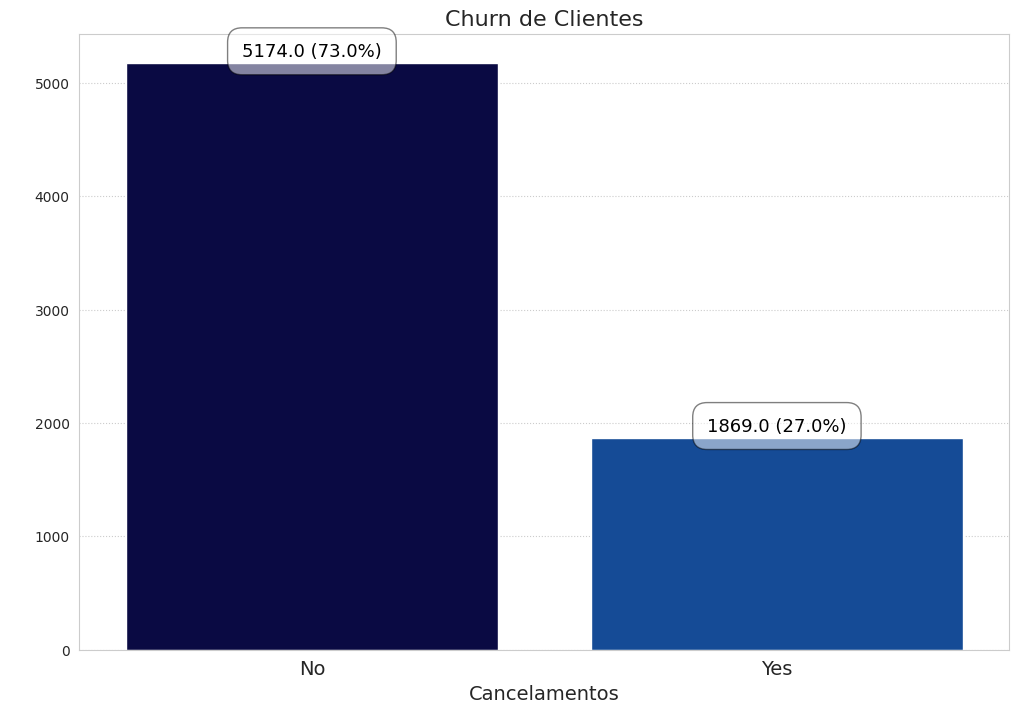

In [48]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(data=telecom_copy, x='churn_class', ax=ax)
plt.title('Churn de Clientes', fontsize=16)
plt.xlabel('Cancelamentos', fontsize=14)
plt.ylabel(' ', fontsize=14)
ax.set_xticklabels(['No', 'Yes'], fontsize=14)

churn_percentage  = telecom_copy['churn_class'].value_counts(normalize=True)
churn_percentage = np.round(churn_percentage*100)
churn_percentage

for p, percentage in zip(ax.patches, churn_percentage):
    height = p.get_height()
    height = p.get_height()
    if height > 0:  # Exclude bars with height 0
        ax.annotate(f'{height} ({percentage}%)',
                    xytext=(0, 2),
                    textcoords='offset points',
                    xy=(p.get_x() + p.get_width() / 2, height),
                    ha='center',
                    va='bottom',
                    color='black',
                    fontsize=13,
                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.8', alpha=0.5))


plt.show()


* Os resultados evidenciam um desequilíbrio significativo entre as classes no conjunto de dados, com uma notável predominância da classe "0" (sem churn). A proporção de classes indica que cerca de 73% das observações pertencem à classe "0", enquanto apenas 27% pertencem à classe "1" (churn).

* O índice de desequilíbrio de classes, calculado como a razão entre a proporção da classe majoritária pela classe minoritária, é aproximadamente 0.36. Um índice menor que 1.0 indica desequilíbrio, e valores mais baixos indicam um desequilíbrio mais acentuado. Nesse caso, a classe "0" é consideravelmente mais predominante do que a classe "1".

* O desequilíbrio de classes pode afetar o treinamento do modelo, inclinando-o para a classe majoritária e resultando em previsões enviesadas. Técnicas de oversampling podem ser uma alternativa para contornar esse problema.

<center><img src="1_7XX9MqDUXrTei5FMXjTKyQ.png" width="700" height="464"></center>

* Quanto mais uma classe é representada, ou seja, quanto mais observações, mais fácil para o modelo aprender sobre essa classe. No entanto, se uma classe tem menos observações, o modelo terá mais dificuldade em aprender sobre ela e tenderá a ter boas previsões apenas para a classe majoritária. Diante desse problema de desequilíbrio de classes, surge a técnica de oversampling randomizado, que cria novas instâncias da classe menos representada sem perder informações cruciais para o treinamento. 

* No entanto, a adição de instâncias randomizadas pode gerar problemas como informações repetitivas, perda de variedade e inflação artificial do número de exemplos da classe minoritária, impactando positivamente as métricas de desempenho durante o treinamento, mas sem realmente melhorar a capacidade do modelo de generalizar para novos dados.

* Por esse motivo, opto por utilizar o método de oversampling ADASYN (Adaptive Synthetic Sampling), pois:

    * Esse método calcula a densidade local em torno de cada exemplo da classe minoritária, identificando áreas (features) menos representadas. Em seguida, gera novos exemplos sintéticos nessas áreas para equilibrar melhor o conjunto de dados, ajudando o modelo a aprender de maneira mais eficaz.

    * Podemos dizer que o método observa a quantidade de exemplos da classe minoritária em cada feature e cria instâncias sintéticas principalmente nas features com menos observações.

* Além da estratégia de oversampling, irei verificar as métricas de avaliação, como precisão, recall e F1-score, e a curva ROC, uma vez que são menos influenciadas em situações de desequilíbrio de classes.

### Explorando variáveis por classe de churn

#### Características Demográficas

In [49]:
def plot_categorical_churn(data, col):
    # Criando a classe 'Churn'
    data['Churn'] = data['EndDate'].apply(lambda x: 'No Churn' if x == 'No' else 'Churn')

    # Calculando a contagem de churn e não churn por categoria
    contagem = data.groupby([col, 'Churn']).size().unstack(fill_value=0)

    # Calculando o percentual de churn e não churn por categoria
    percentages = contagem.div(contagem.sum(axis=1), axis=0) * 100
    
    # Plotando o gráfico de barras empilhadas
    fig, ax = plt.subplots(figsize=(16, 8))

    sns.barplot(data=percentages.reset_index().melt(id_vars=col, value_name='percentage', var_name='Churn'),
                x=col, y='percentage', hue='Churn', ax=ax)

    plt.xlabel(col, fontsize=16)
    plt.ylabel('Porcentagens', fontsize=16)
    plt.title(f'Porcentagem de Classe de Churn por {col}', fontsize=18)

    # Ajustando os tamanhos das fontes nos ticks e nos percentuais
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xticks(rotation=0)  

    # Adicionando rótulos de percentual nas barras
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=16,
                   bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.8', alpha=0.5))

    # Removendo a legenda automática gerada pelo seaborn e adicionando uma legenda personalizada
    ax.legend(title='Churn', fontsize=15)

    # Exibindo o gráfico
    plt.tight_layout()
    plt.show()


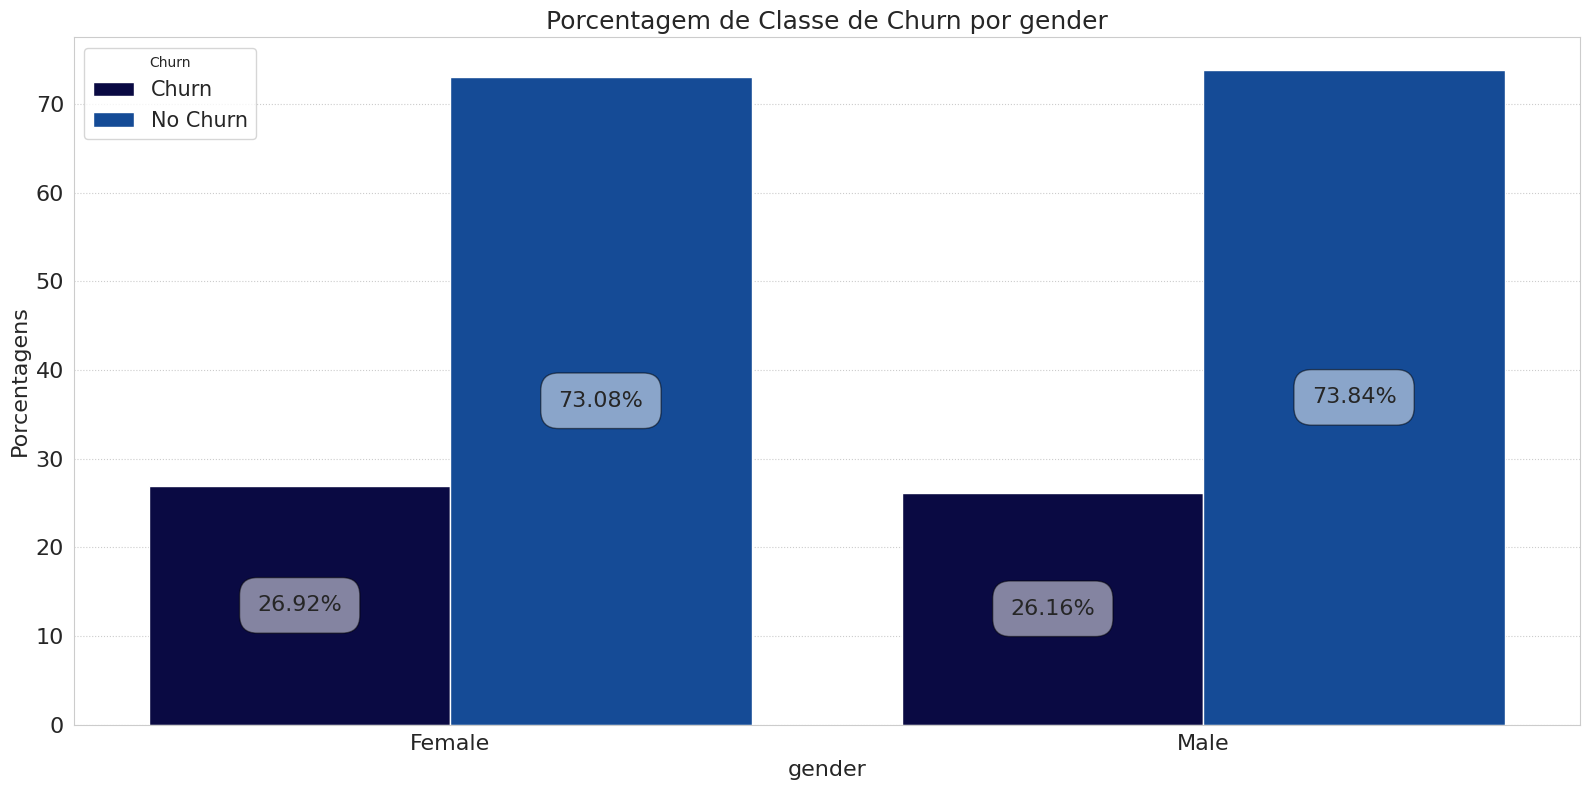

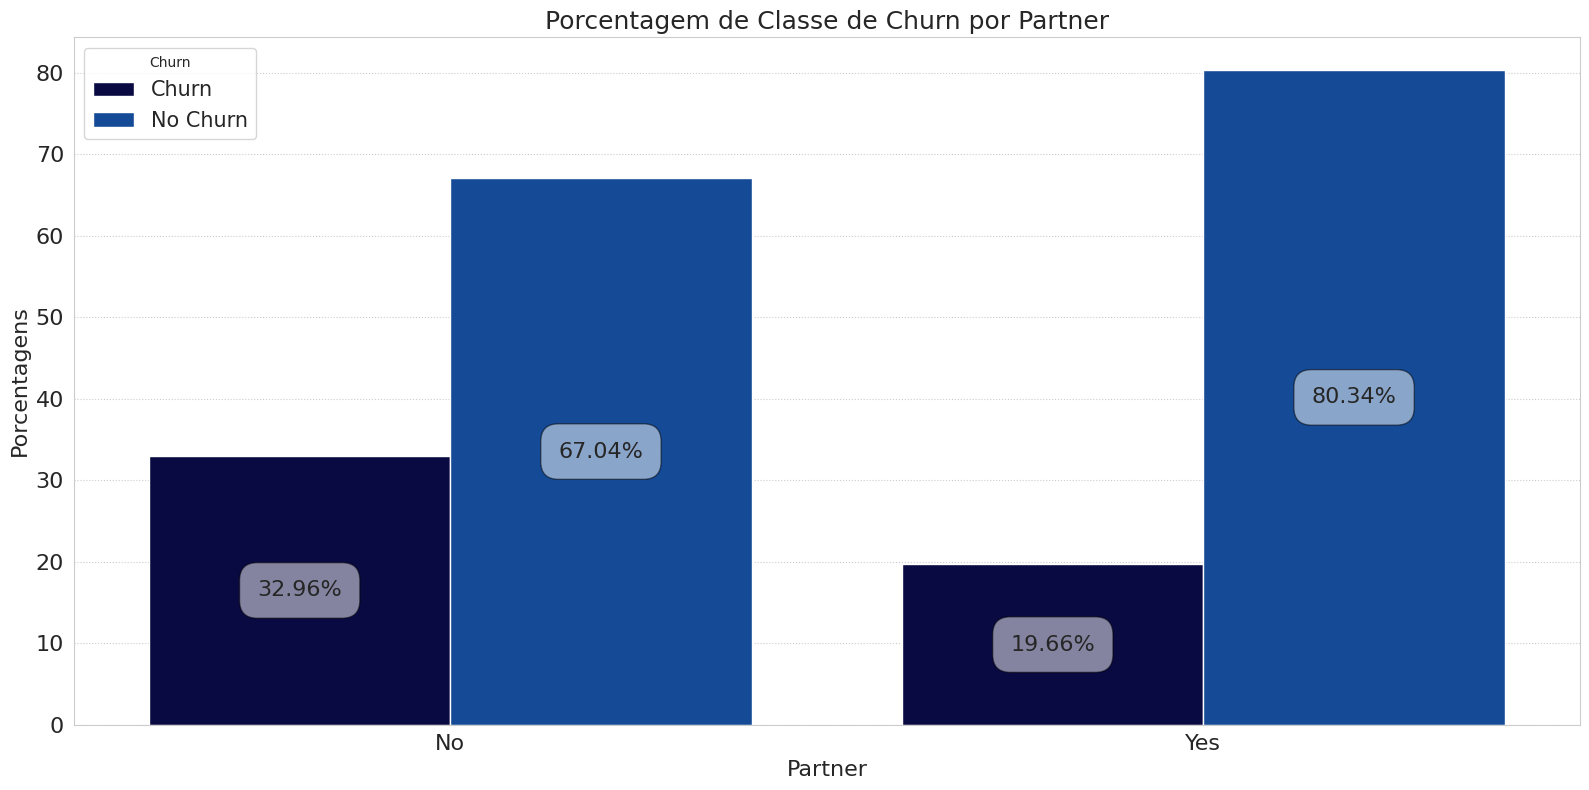

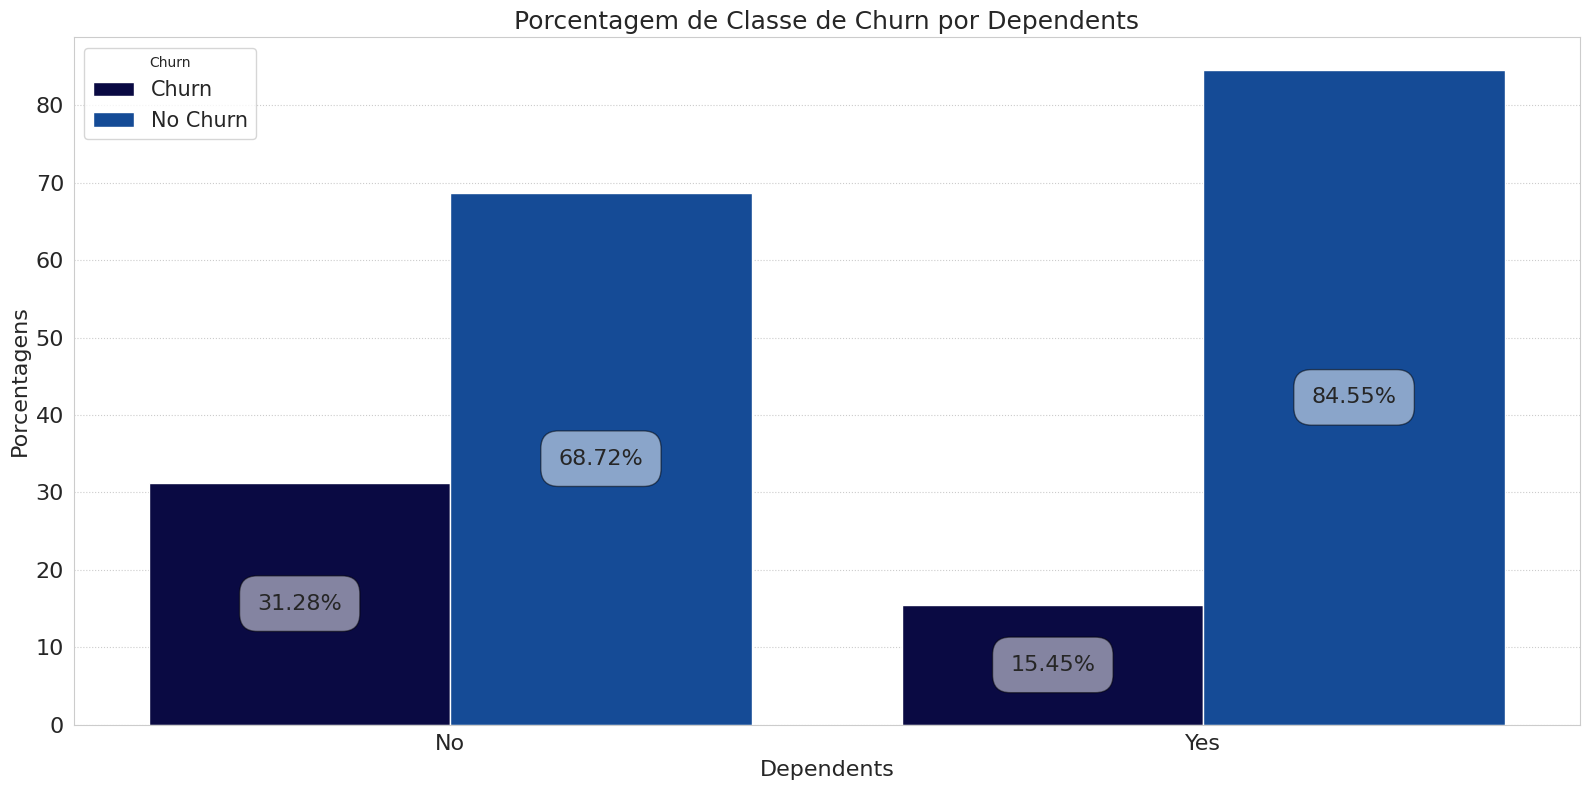

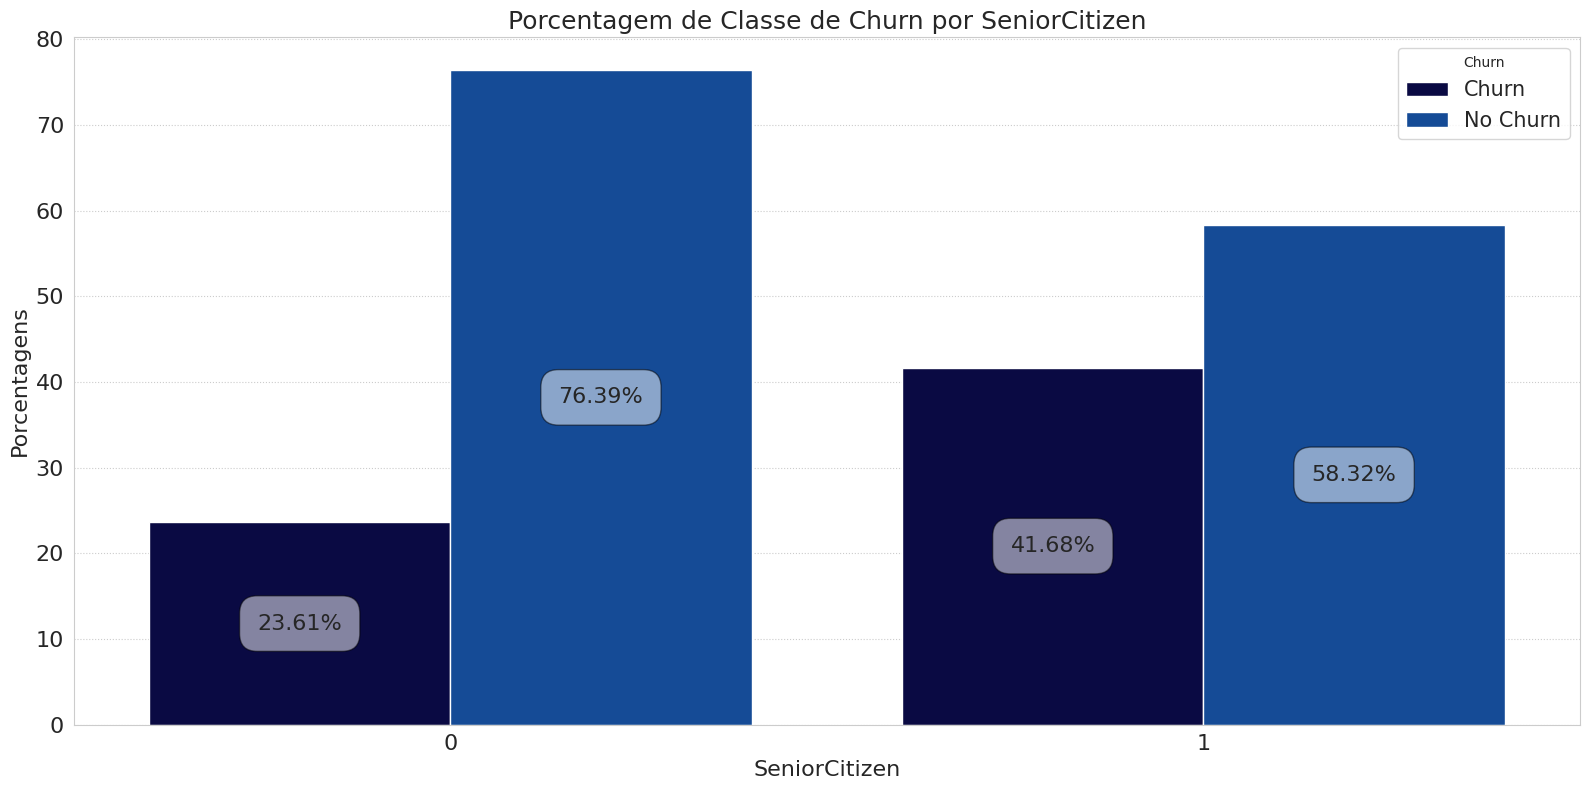

In [50]:
for col in ['gender', 'Partner', 'Dependents', 'SeniorCitizen']:
    plot_categorical_churn(df_telecom, col)

#### Serviços Contratados

In [51]:
df_telecom[['Type', 'PaperlessBilling', 'PaymentMethod']].describe(include='O')

,Type,PaperlessBilling,PaymentMethod
count,7043,7043,7043
unique,3,2,4
top,Month-to-month,Yes,Electronic check
freq,3875,4171,2365


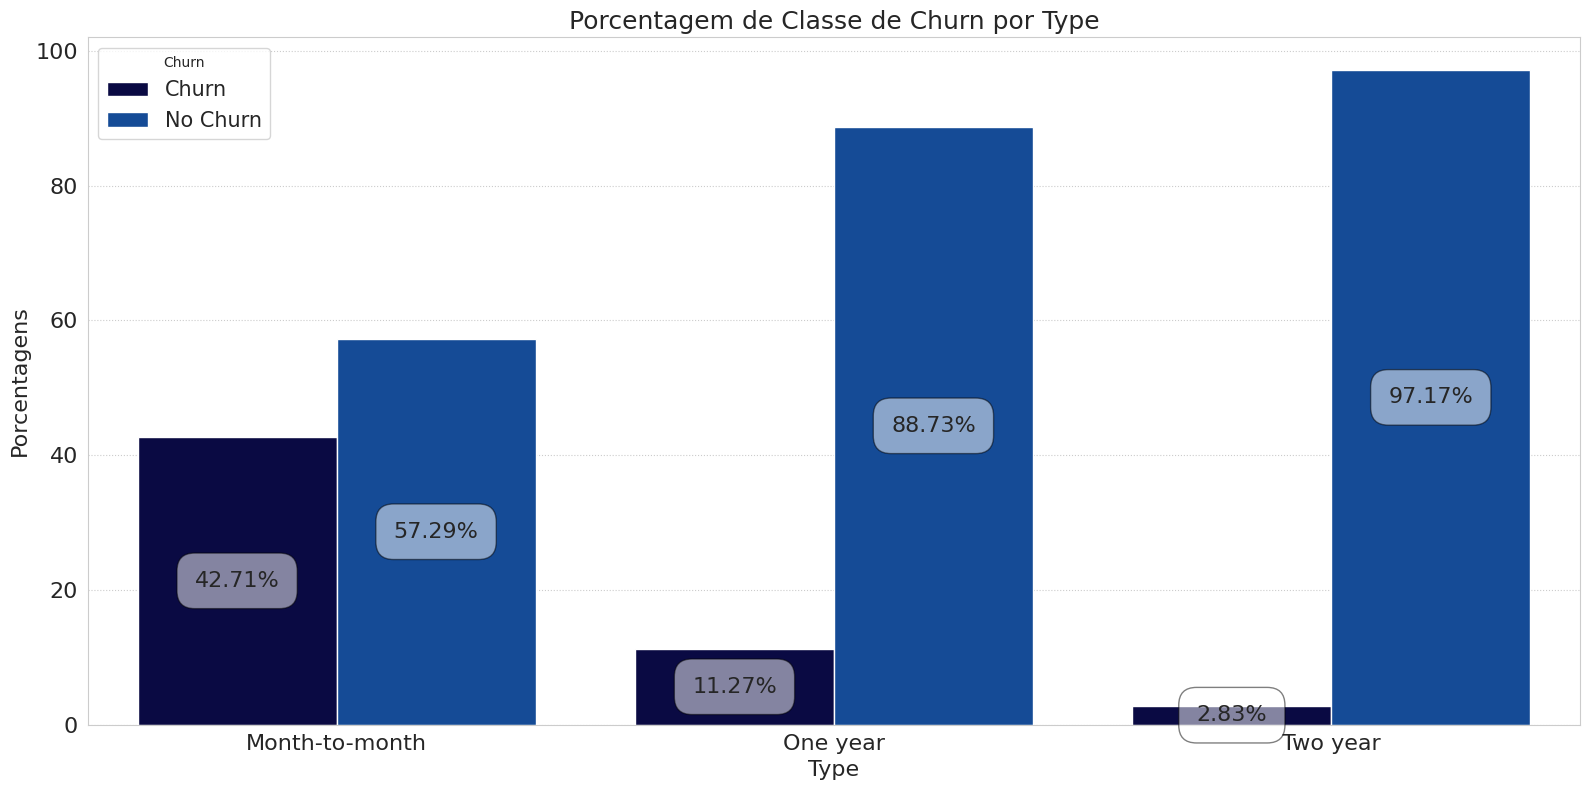

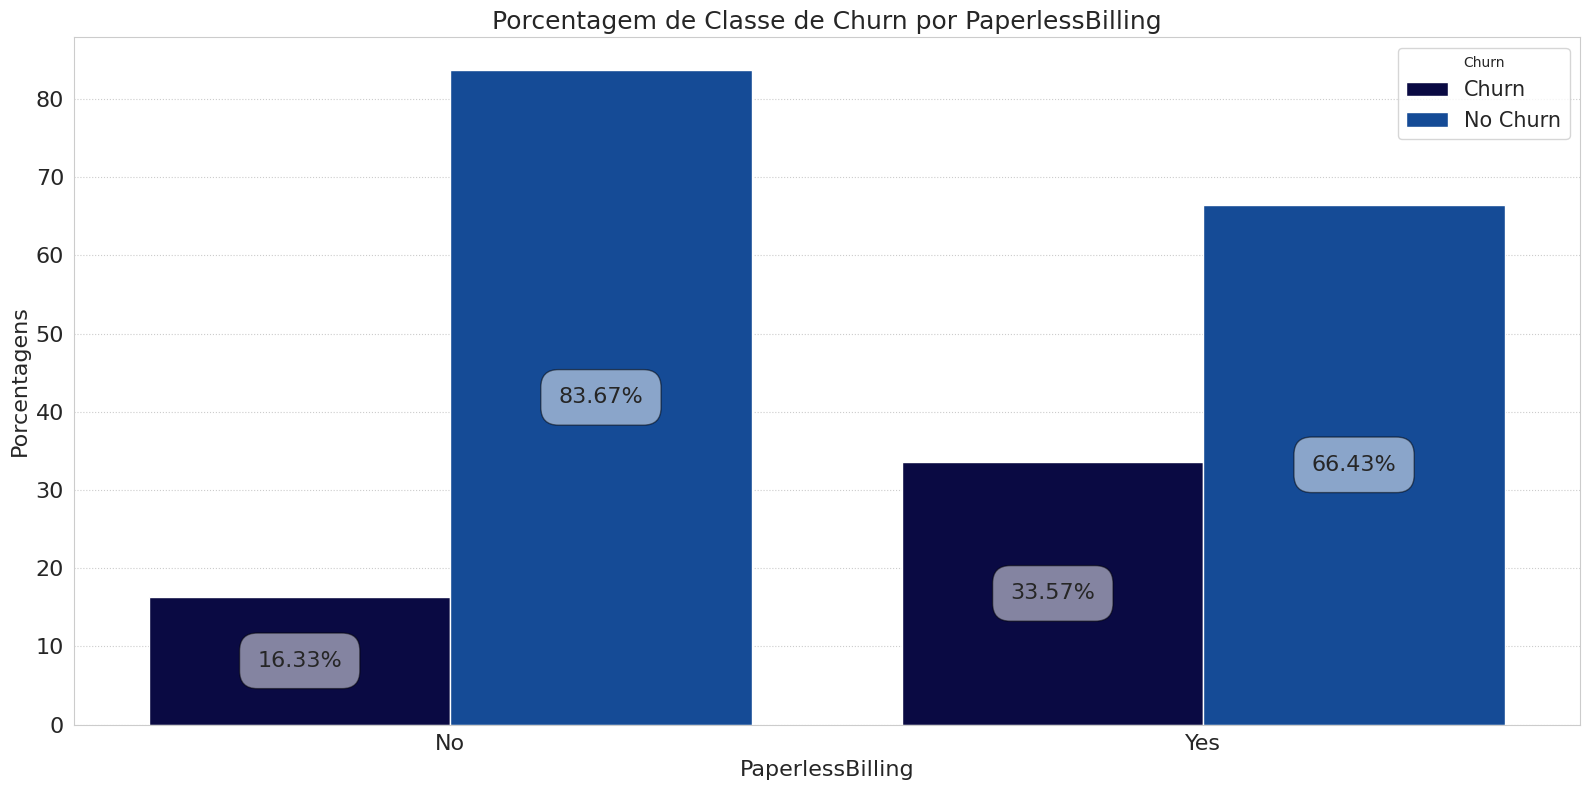

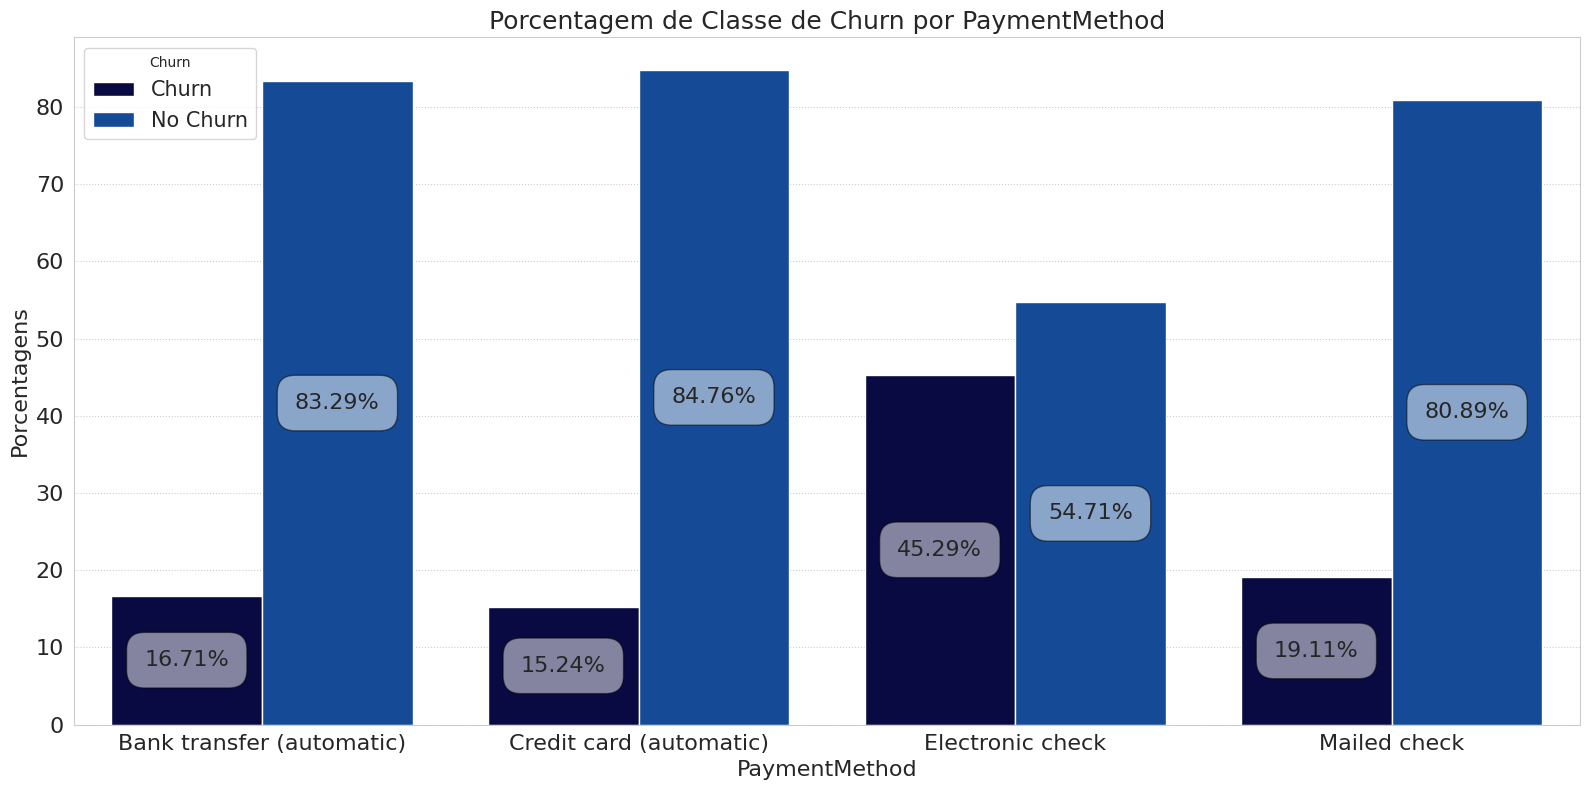

In [52]:
for col in ['Type', 'PaperlessBilling', 'PaymentMethod']:
    plot_categorical_churn(df_telecom, col)

In [53]:
telecom_copy.contract_months.describe()

count    7043.000000
mean       33.548568
std        24.553214
min         0.000000
25%        10.200000
50%        29.433333
75%        56.866667
max        77.133333
Name: contract_months, dtype: float64

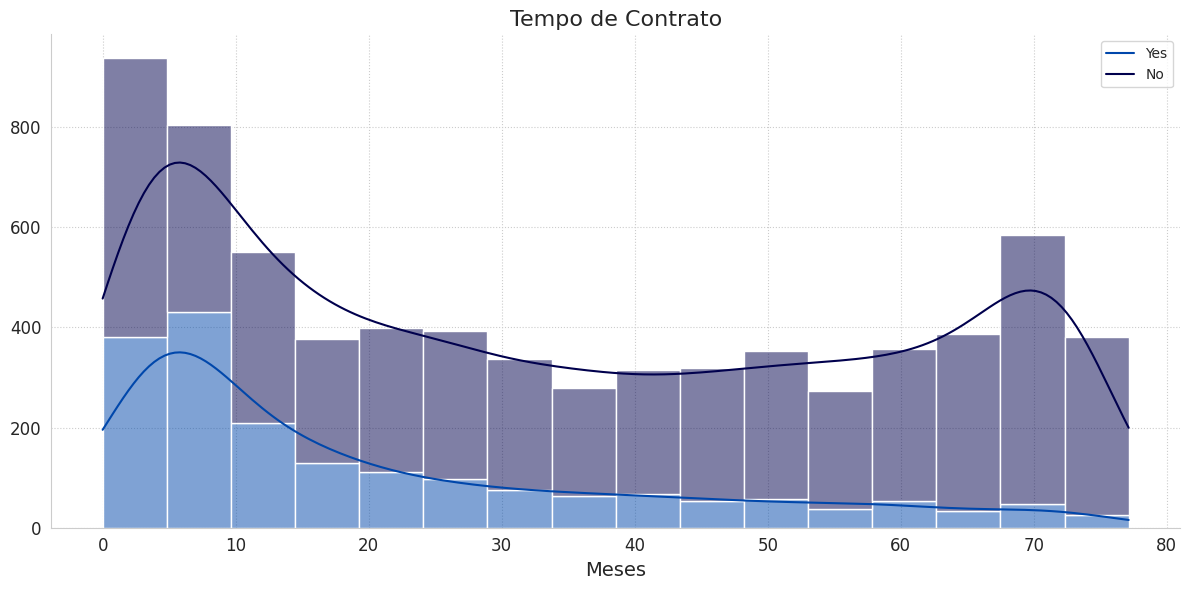

In [54]:
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(data=telecom_copy, x='contract_months', hue='churn_class', multiple='stack', ax=ax, kde=True)
ax.set_title("Tempo de Contrato", fontsize=16)
ax.set_xlabel('Meses', fontsize=14)
ax.set_ylabel('', fontsize=14)
plt.legend(['Yes', 'No'])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

#### Serviços de Internet

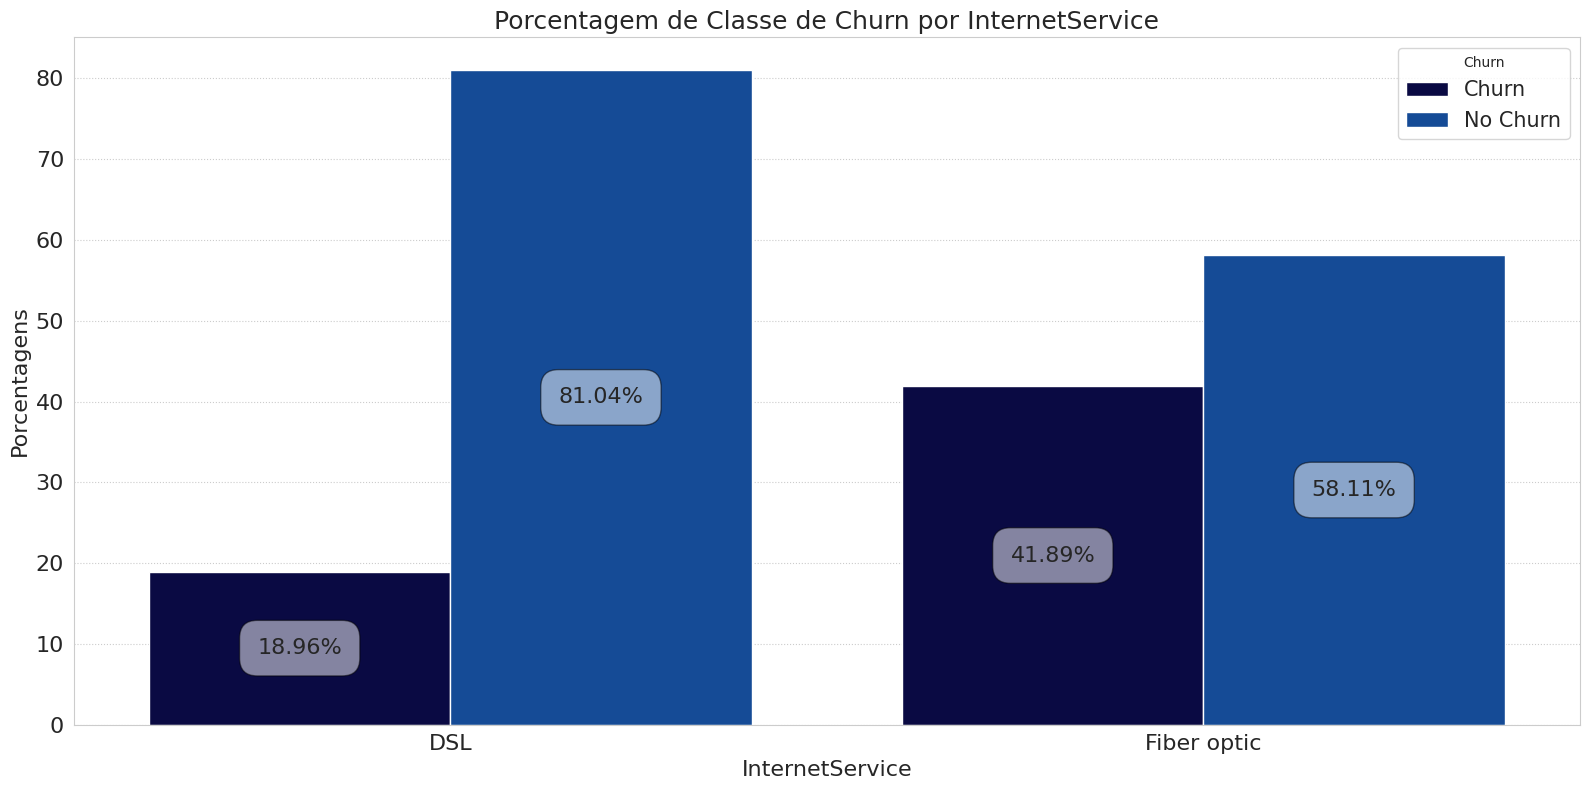

In [55]:
plot_categorical_churn(df_telecom, 'InternetService')

In [56]:
has_additional_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

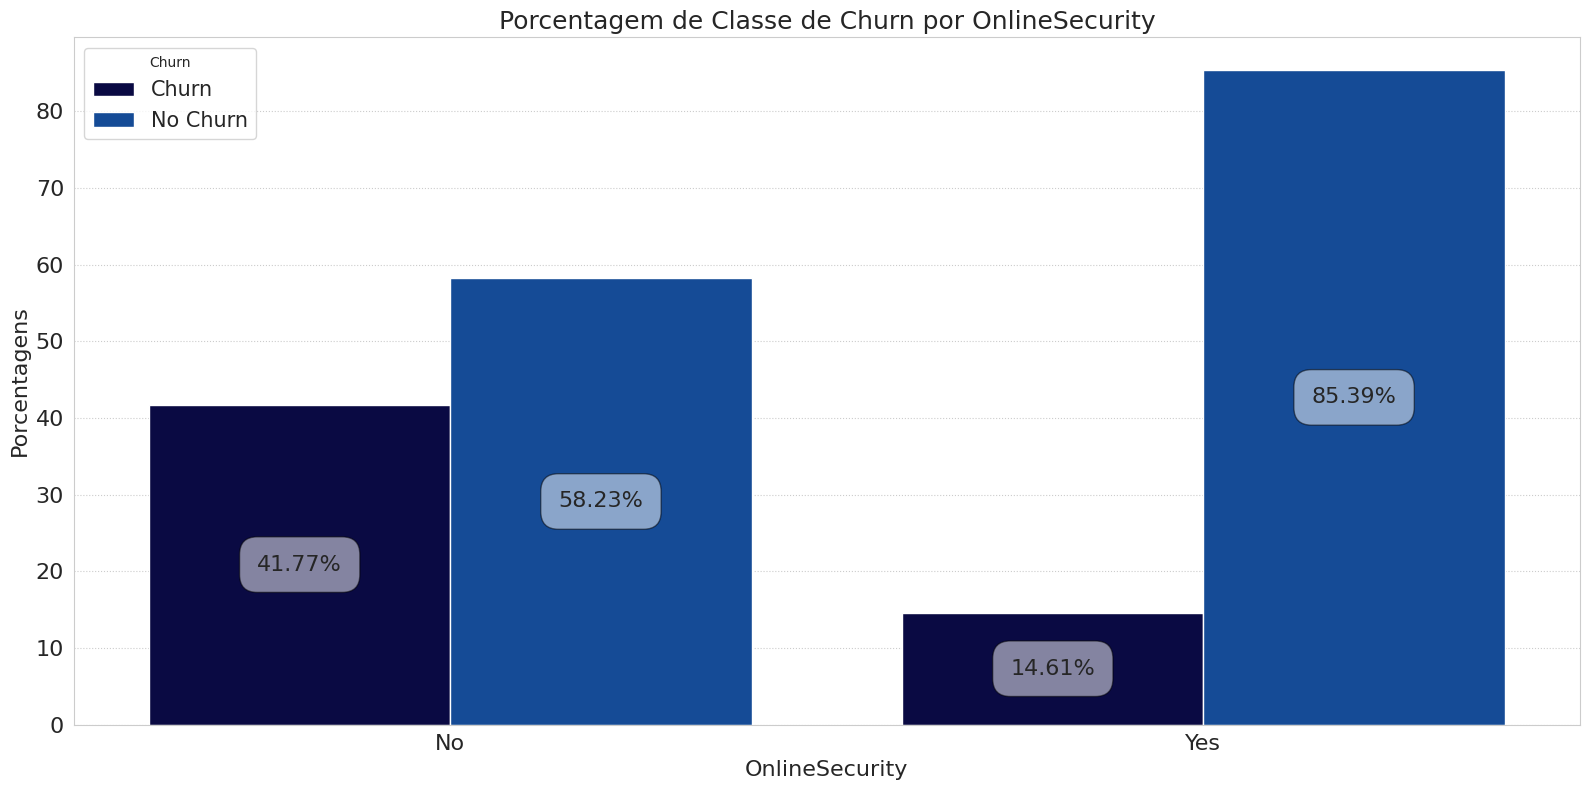

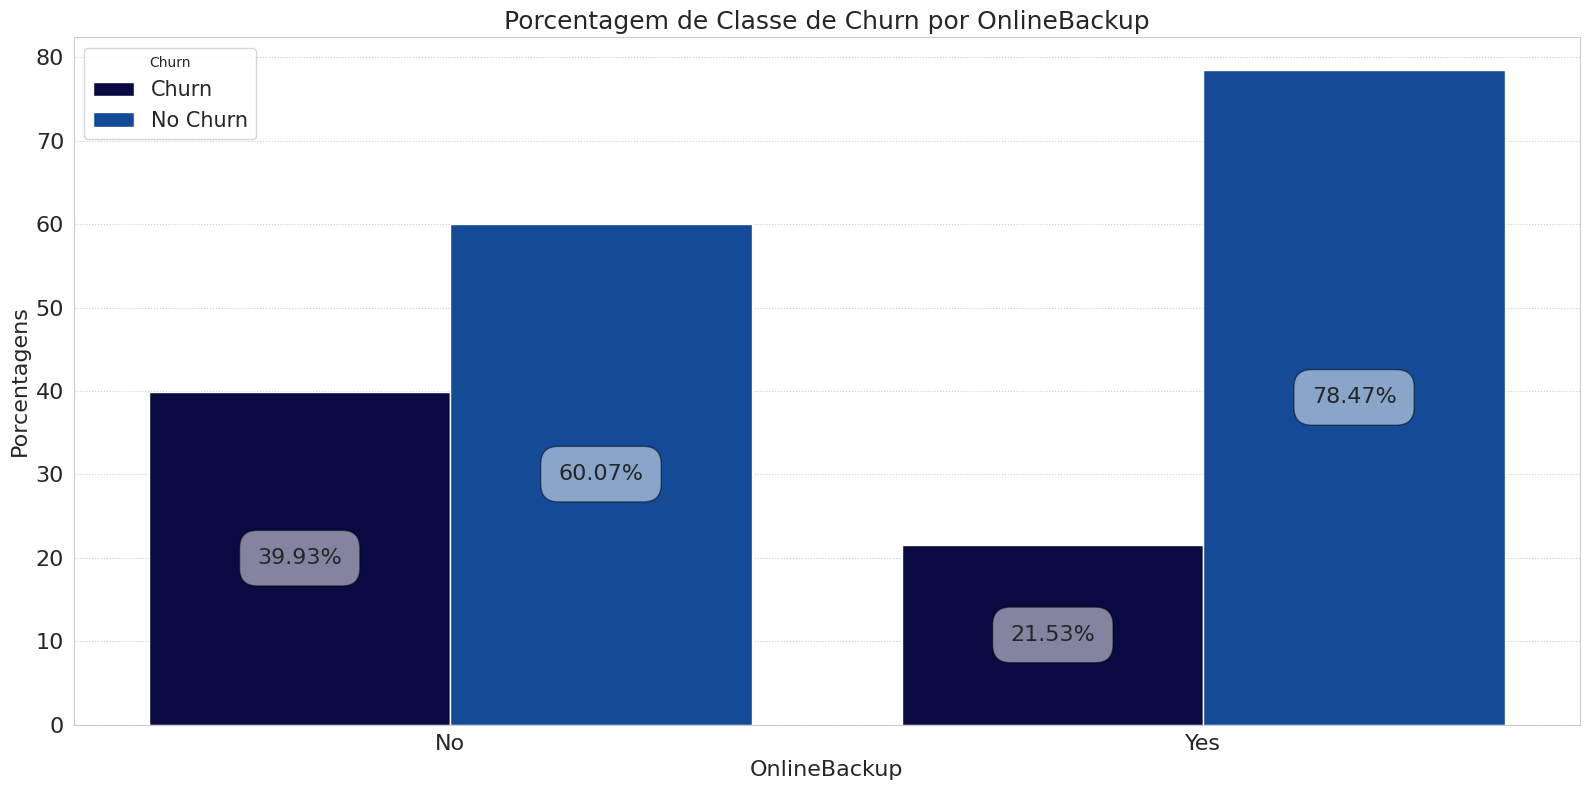

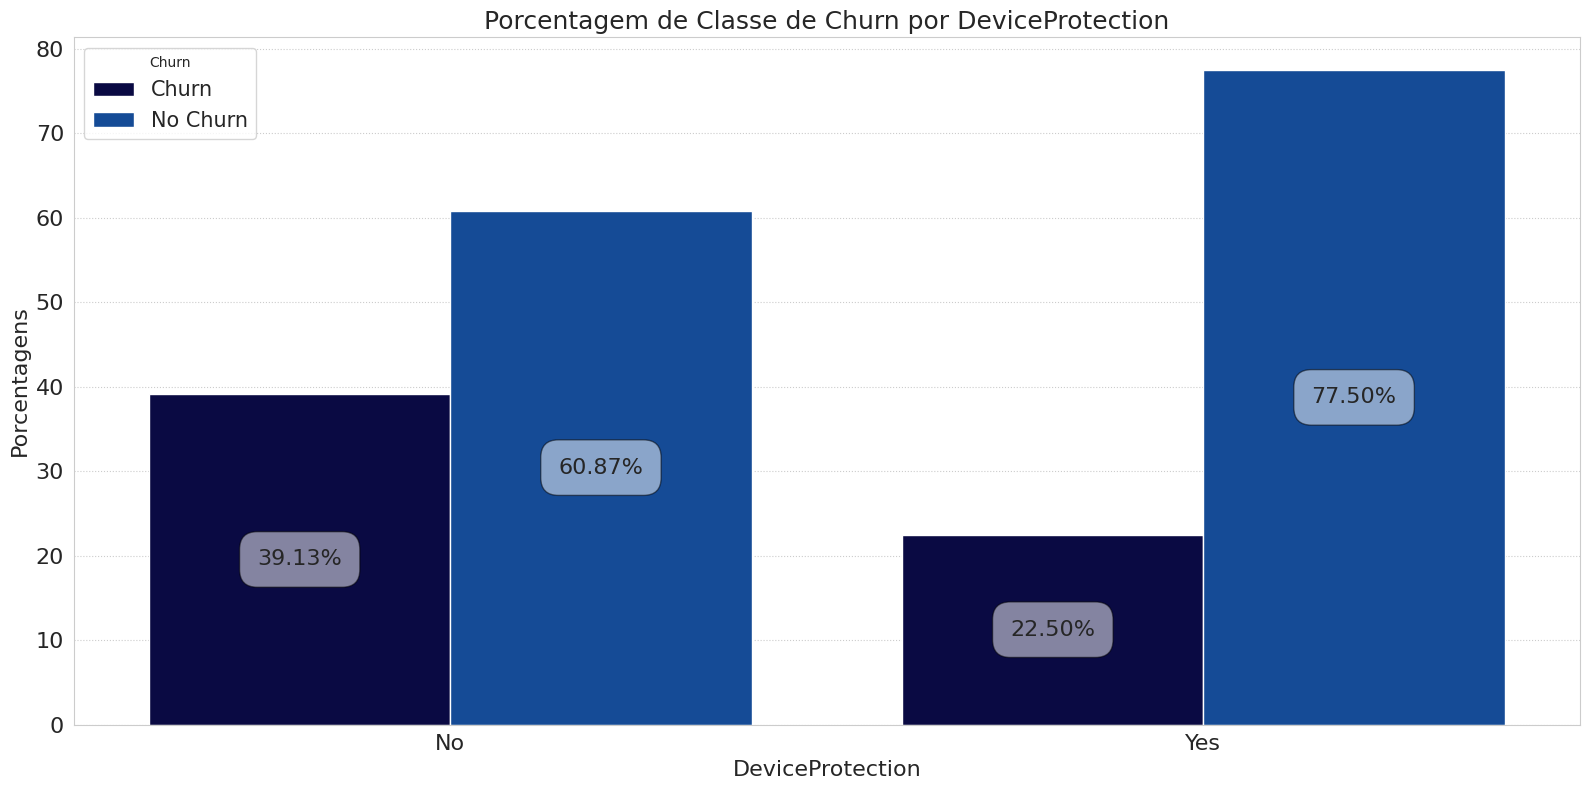

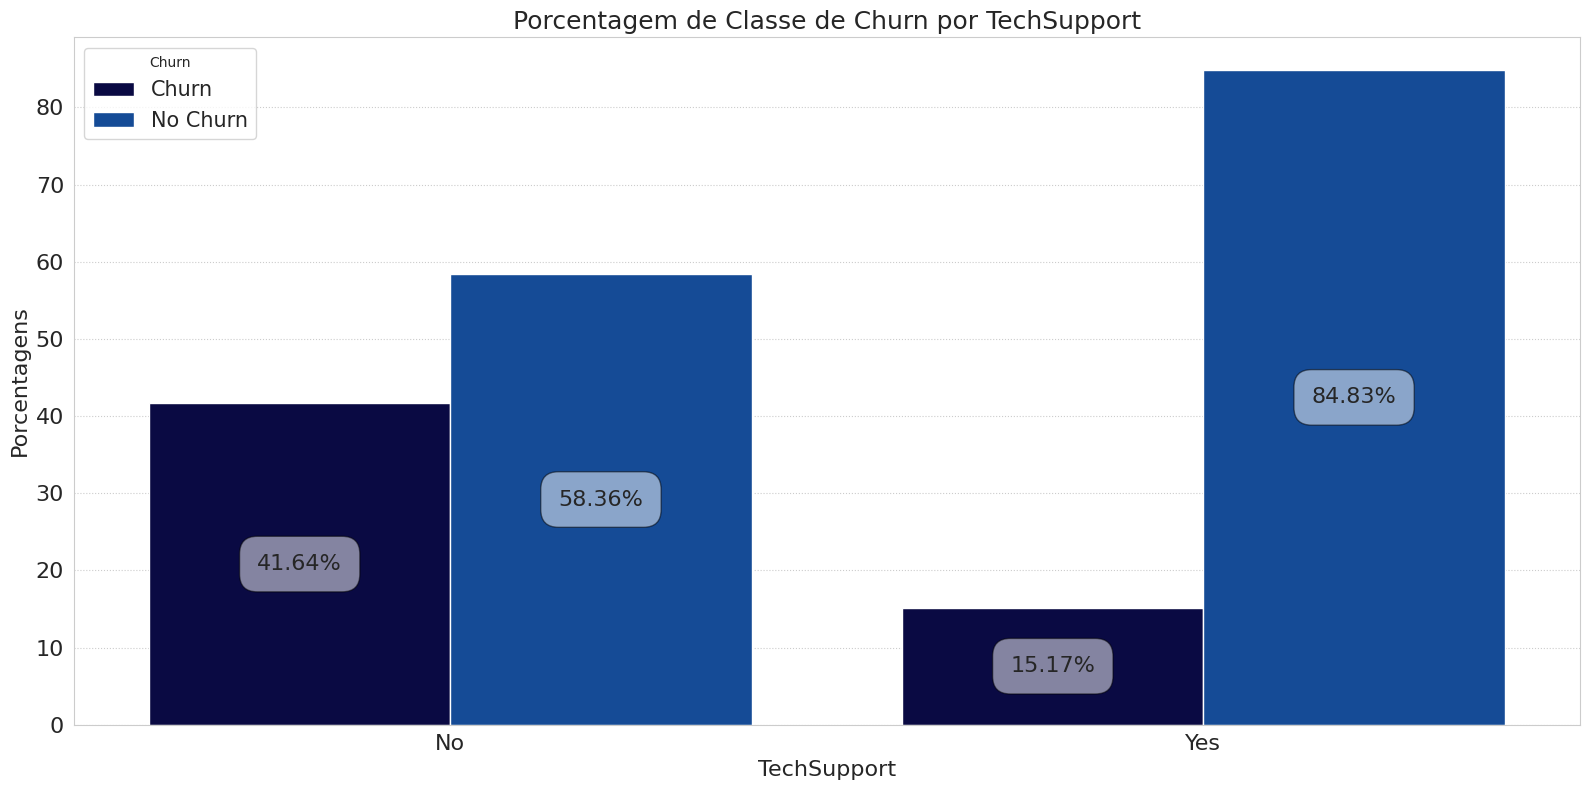

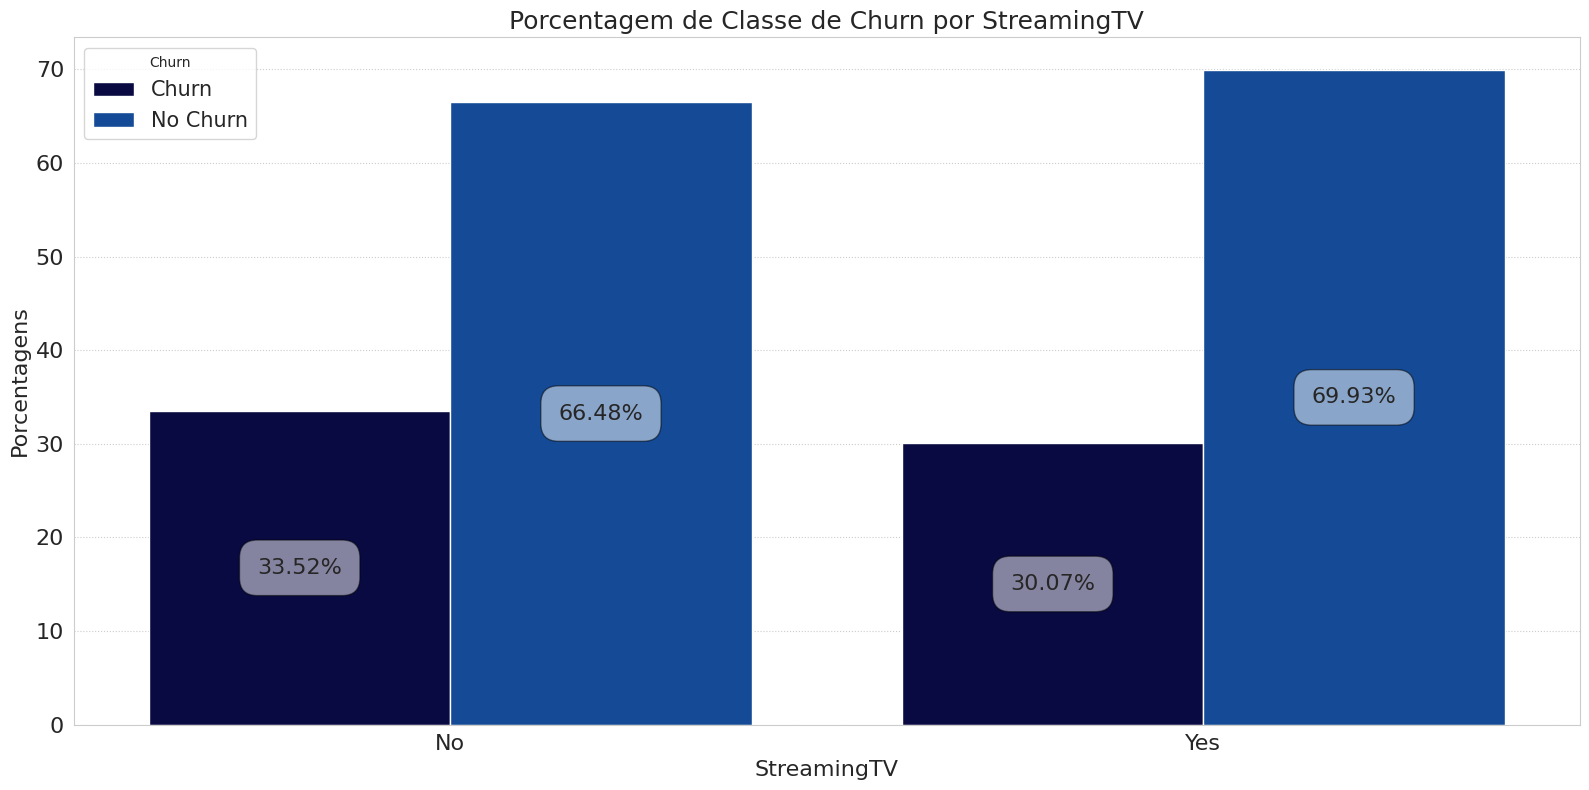

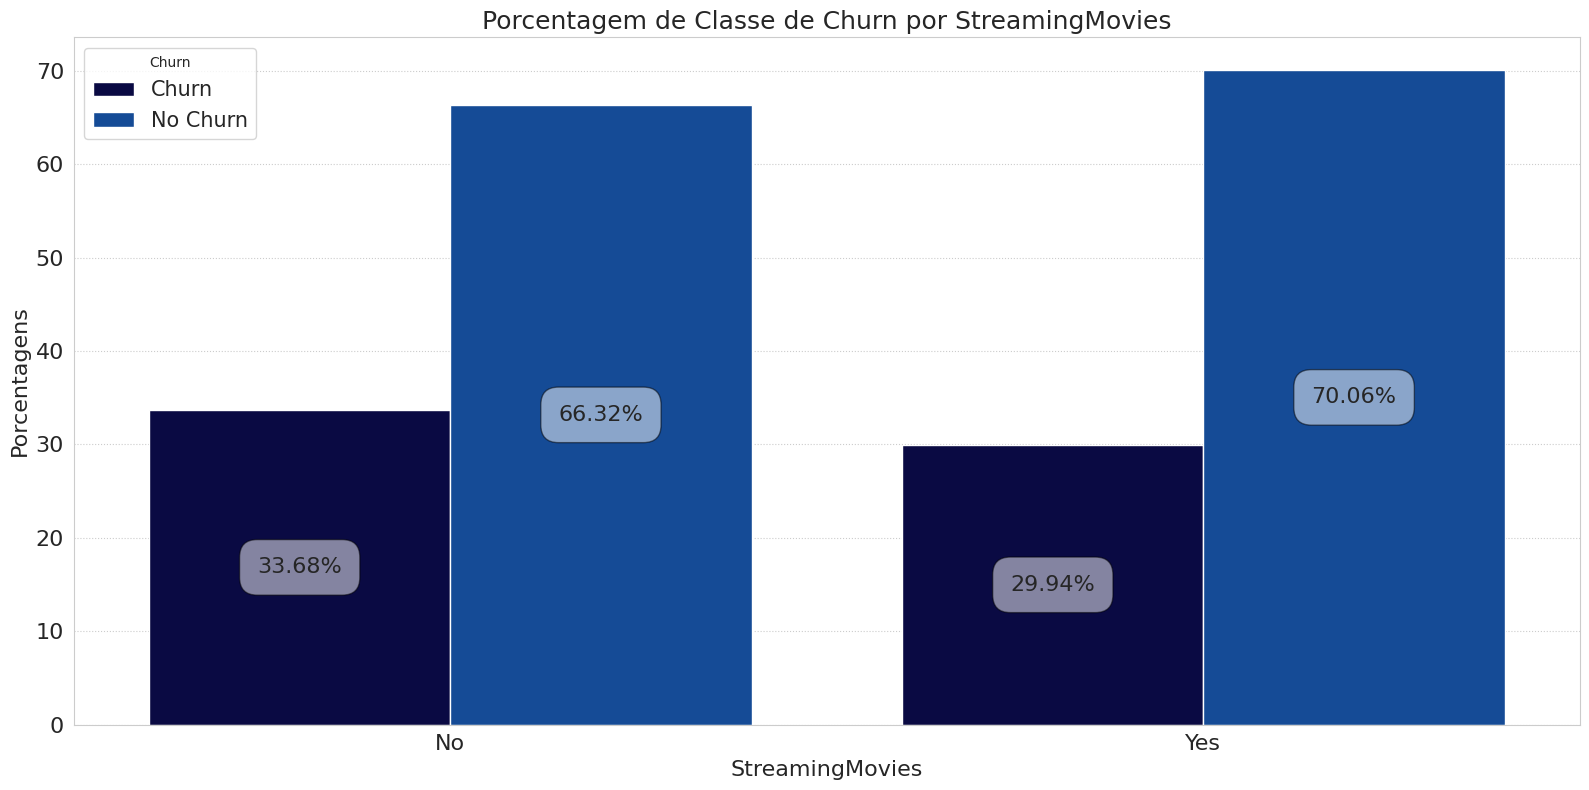

In [57]:
for col in has_additional_services:
    plot_categorical_churn(df_telecom, col)

In [58]:
def num_additional_services(df):
    # Lista com serviços adicionais
    columns = ['online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']

    # Criar coluna com a quantidade de serviços adicionais assinados
    df['num_additional_services'] = df[columns].apply(lambda row: row[row == 1].count(), axis=1)

In [59]:
num_additional_services(telecom_copy)

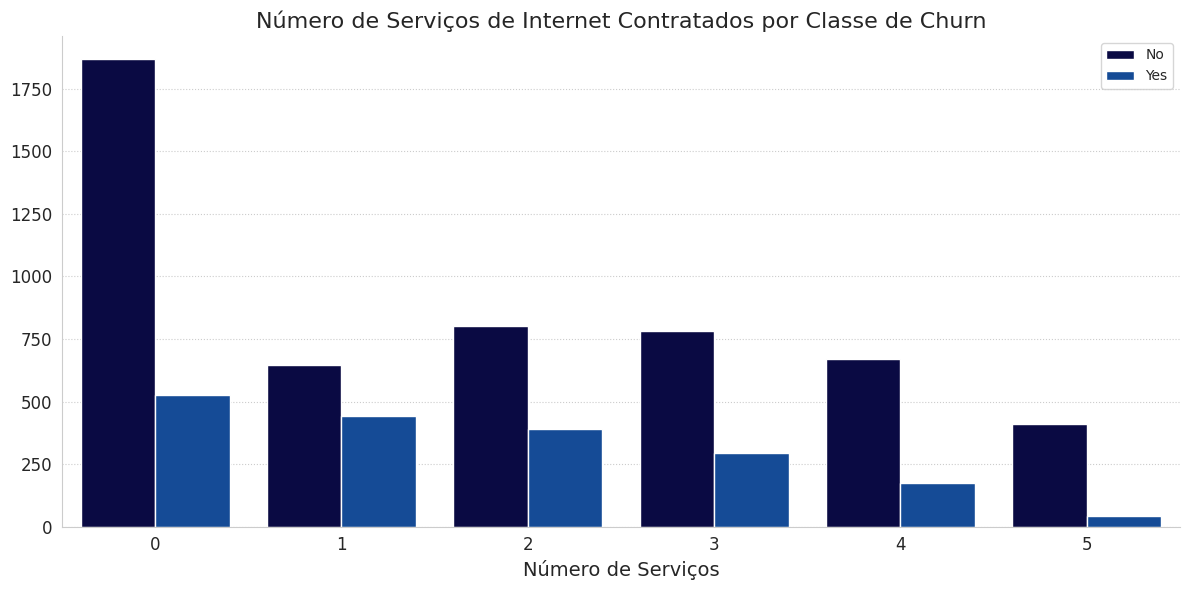

In [60]:
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(data=telecom_copy, x='num_additional_services', hue='churn_class', ax=ax)
ax.set_title("Número de Serviços de Internet Contratados por Classe de Churn", fontsize=16)
ax.set_xlabel('Número de Serviços', fontsize=14)
ax.set_ylabel('', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine()
plt.legend(['No', 'Yes'])
plt.tight_layout()
plt.show()

#### Linhas Múltiplas

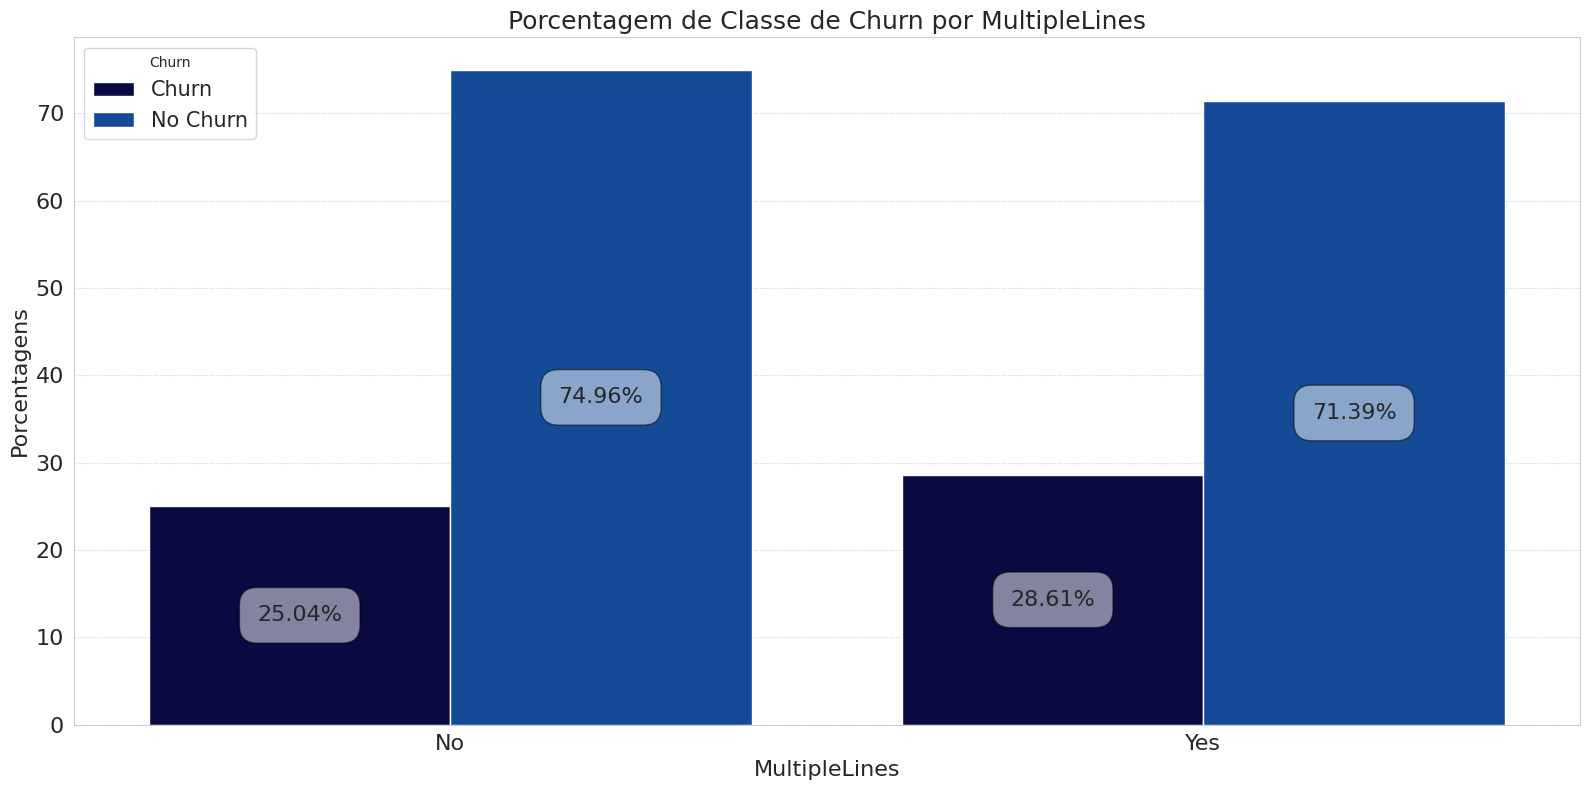

In [61]:
plot_categorical_churn(df_telecom, 'MultipleLines')

#### Gastos

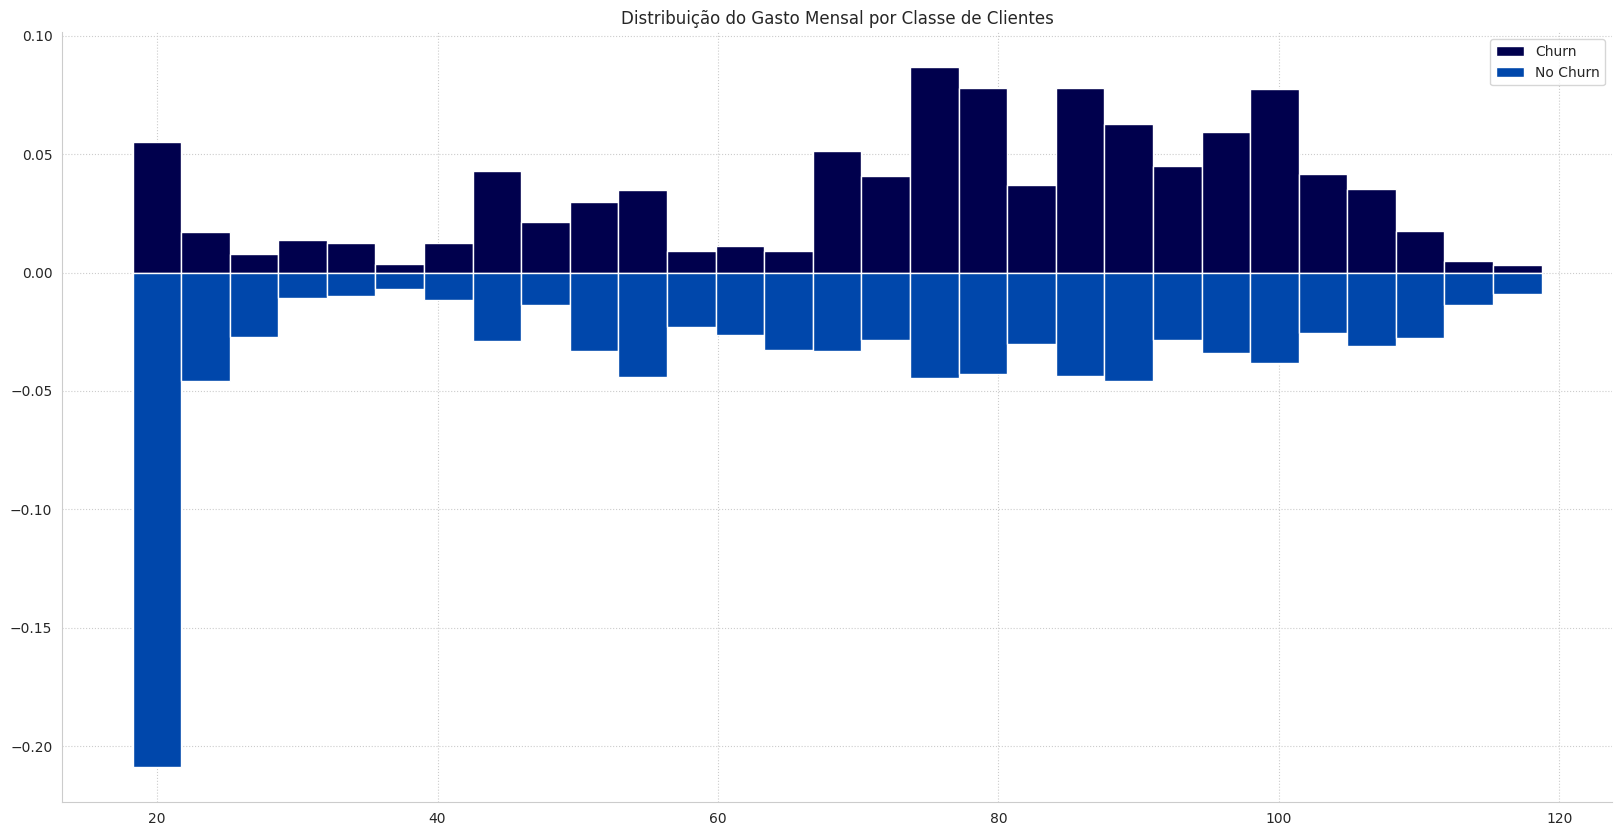

In [62]:
# Dados específicos para churn e no churn
churn = telecom_copy[telecom_copy['churn_class'] == 1]['monthly_charges']
no_churn = telecom_copy[telecom_copy['churn_class'] == 0]['monthly_charges']

# Configurar o histograma
bins = np.linspace(telecom_copy['monthly_charges'].min(), telecom_copy['monthly_charges'].max(), 30)

# Calcular histograma para churn
hist_churn, _ = np.histogram(churn, bins=bins, density=True)

# Calcular histograma para no churn
hist_no_churn, _ = np.histogram(no_churn, bins=bins, density=True)

# Criar figura e eixo
fig, ax = plt.subplots(figsize=(20,10))

# Plotar barras para churn
ax.bar(bins[:-1], hist_churn / np.sum(hist_churn), width=np.diff(bins), edgecolor='w', align="edge", label='Churn')

# Plotar barras para no churn
ax.bar(bins[:-1], -hist_no_churn / np.sum(hist_no_churn), width=np.diff(bins), edgecolor='w', align="edge", label='No Churn')

# Adicionar legendas e ajustes visuais
plt.title('Distribuição do Gasto Mensal por Classe de Clientes')
plt.legend()
sns.despine()
plt.show()


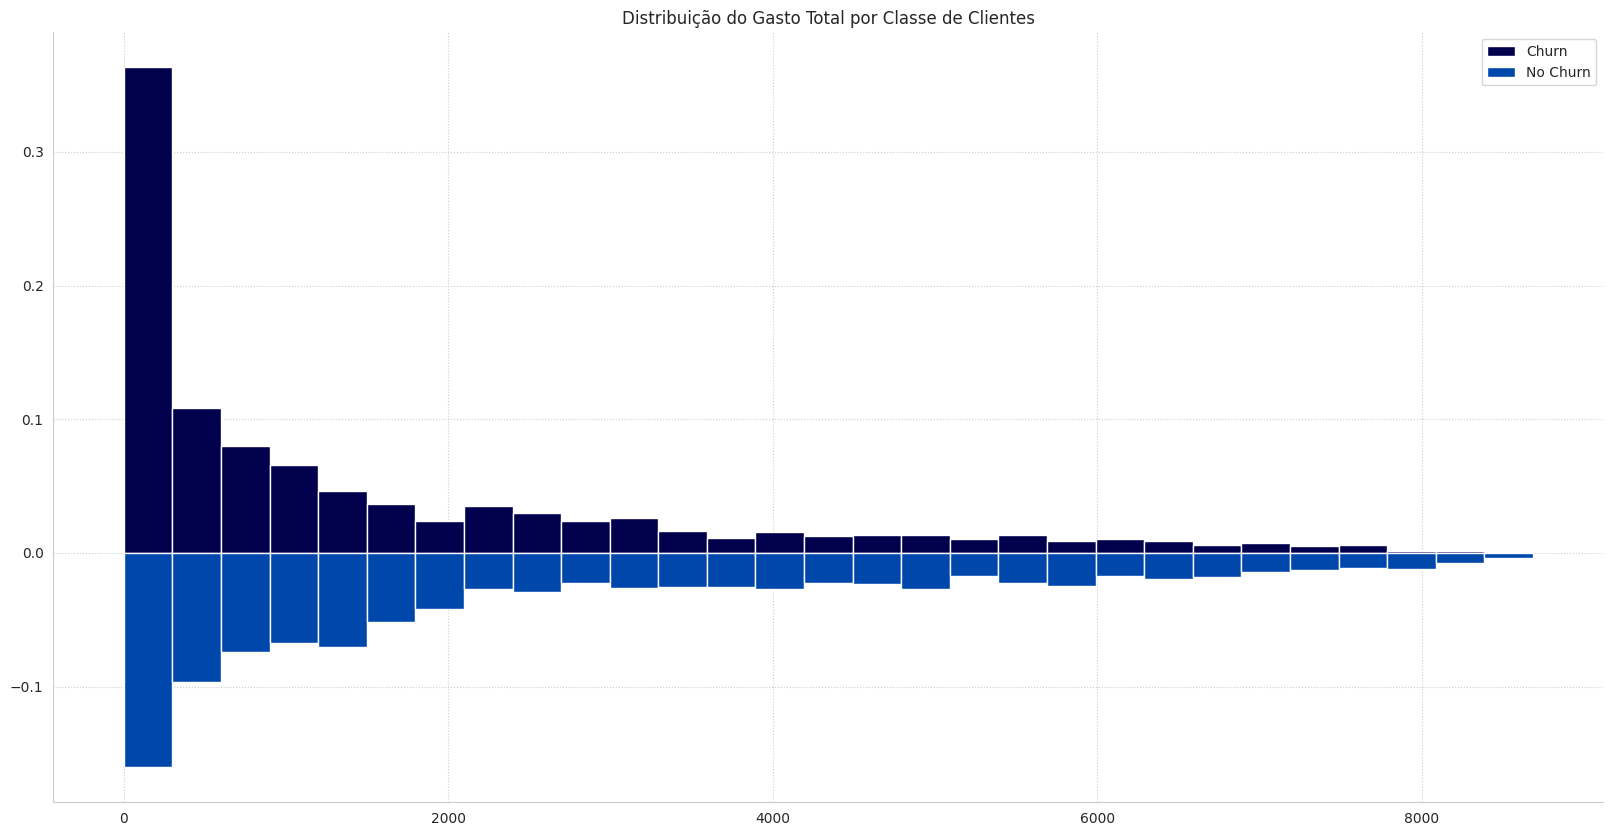

In [63]:
# Dados específicos para churn e no churn
churn = telecom_copy[telecom_copy['churn_class'] == 1]['total_charges']
no_churn = telecom_copy[telecom_copy['churn_class'] == 0]['total_charges']

# Configurar o histograma
bins = np.linspace(telecom_copy['total_charges'].min(), telecom_copy['total_charges'].max(), 30)

# Calcular histograma para churn
hist_churn, _ = np.histogram(churn, bins=bins, density=True)

# Calcular histograma para no churn
hist_no_churn, _ = np.histogram(no_churn, bins=bins, density=True)

# Criar figura e eixo
fig, ax = plt.subplots(figsize=(20,10))

# Plotar barras para churn
ax.bar(bins[:-1], hist_churn / np.sum(hist_churn), width=np.diff(bins), edgecolor='w', align="edge", label='Churn')

# Plotar barras para no churn
ax.bar(bins[:-1], -hist_no_churn / np.sum(hist_no_churn), width=np.diff(bins), edgecolor='w', align="edge", label='No Churn')

# Adicionar legendas e ajustes visuais
plt.title('Distribuição do Gasto Total por Classe de Clientes')
plt.legend()
sns.despine()
plt.show()


**De um modo geral é possível ver que a maioria dos clientes do:**

* **Grupo Churn:**

    * Há uma proporção semelhante de gêneros na categoria de clientes que deixaram de utilizar os serviços.
    * A maioria desses clientes não possui parceiro ou dependentes, indicando uma tendência para clientes individuais.
    * O grupo de churn tem uma presença significativa de idosos, possivelmente indicando uma falta de retenção de clientes mais experientes.
    * Contratos mensais, faturas sem papel e pagamentos via Electronic Check são características predominantes entre clientes de churn.
    * A distribuição do tempo de contrato concentra-se principalmente entre 0 e 20 meses.
    * A preferência pela Internet de fibra óptica, juntamente com a ausência de serviços como Online Security, Online Backup, Device Protection e Tech Support, pode indicar uma insatisfação com a qualidade dos serviços oferecidos.
    * Há uma pequena diferença perceptível entre os clientes de churn que possuem e não possuem serviços como Stream TV, Stream Movies e linhas múltiplas.
    * O gasto mensal apresenta uma distribuição multimodal, com picos em torno de $20 e $45, enquanto a maioria dos gastos totais está na faixa de $1 a 2000.

* **Grupo Não Churn:**

    * Os clientes que permanecem são proporcionais nos gêneros, indicando uma distribuição equitativa entre homens e mulheres.
    * A maioria desses clientes possui parceiro e dependentes, sugerindo uma preferência por serviços familiares.
    * A maioria é composta por adultos, indicando uma clientela mais estável e menos propensa a churn.
    * Contratos de um ano, faturas com papel e opções de pagamento como cartão de crédito e transferência são características mais comuns entre os clientes estáveis.
    * A distribuição do tempo de contrato mostra picos entre 0-10 meses e 65-75 meses, indicando uma variedade de clientes mais recentes e clientes de longa data.
    * A preferência pela Internet DSL, juntamente com a presença de serviços como Online Security, Online Backup, Device Protection e Tech Support, sugere uma satisfação com os serviços prestados.
    * Há uma pequena diferença entre os clientes que possuem e não possuem serviços como Stream TV, Stream Movies e linhas múltiplas.
    * O gasto mensal está concentrado em torno de $20, indicando uma faixa de preço mais estável, e os gastos totais são predominantemente entre $1 e 2000.

* Nota-se que quanto mais serviços adicionais de internet um cliente possui, menor é a taxa de churn. Isso sugere que a oferta de serviços adicionais pode ser uma estratégia eficaz na retenção de clientes.

## Métricas de Retenção de Clientes

### Taxa de Churn

In [64]:
taxa_churn = telecom_copy['churn_class'].mean()
print(f"Taxa de Churn: {taxa_churn:.2%}")

Taxa de Churn: 26.54%


### Retenção de Clientes

In [65]:
taxa_retencao = 1 - taxa_churn
print(f"Taxa de Retenção: {taxa_retencao:.2%}")

Taxa de Retenção: 73.46%


### Duração Média de Contrato

In [66]:
media_contrato = telecom_copy['contract_months'].mean()
print(f"Duração Média do Contrato: {media_contrato:.2f} meses")

Duração Média do Contrato: 33.55 meses


### Densidade de Churn por Serviço Adicional

In [67]:
churn_add_service = telecom_copy.groupby('num_additional_services')['churn_class'].mean()
print("Densidade de Churn por Serviço Adicional:")
print(churn_add_service.map(lambda x: f'{x:.2%}'))


Densidade de Churn por Serviço Adicional:
num_additional_services
0    22.01%
1    40.70%
2    32.66%
3    27.44%
4    20.73%
5     9.05%
Name: churn_class, dtype: object


### Densidade de Churn por Tipo de Contrato

In [68]:
churn_type = telecom_copy.groupby('type')['churn_class'].mean()
print("Densidade de Churn por Tipo de Contrato:")
print(churn_type.map(lambda x: f'{x:.2%}'))


Densidade de Churn por Tipo de Contrato:
type
0    42.71%
1    11.27%
2     2.83%
Name: churn_class, dtype: object


### Densidade de Churn por Método de Pagamento

In [69]:
churn_payment_method = telecom_copy.groupby('payment_method')['churn_class'].mean()
print("Densidade de Churn por Método de Pagamento:")
print(churn_payment_method.map(lambda x: f'{x:.2%}'))

Densidade de Churn por Método de Pagamento:
payment_method
0    16.71%
1    15.24%
2    45.29%
3    19.11%
Name: churn_class, dtype: object


### Tempo até Desistência

In [70]:
churned_customers = telecom_copy[telecom_copy['churn_class'] == 1]

# Calcule o tempo médio até o churn para todo o conjunto de dados
time_to_churn = churned_customers['contract_months'].mean()

print("Tempo Médio até o Churn para Todo o Conjunto de Dados:")
print(f'{time_to_churn:.2f} meses')

Tempo Médio até o Churn para Todo o Conjunto de Dados:
20.82 meses


* A taxa de churn atual é de 26.54%, indicando que aproximadamente 1/4 dos clientes deixaram de utilizar os serviços durante o período avaliado.

* A taxa de retenção, que é complementar à taxa de churn, está em 73.46%. Isso significa que cerca de 3/4 dos clientes permaneceram como usuários ativos durante o mesmo período.

* A duração média do contrato é de 33.55 meses, sugerindo uma estabilidade razoável no relacionamento entre a empresa e seus clientes.

* A densidade de churn varia conforme o número de serviços adicionais de internet utilizados pelos clientes.

* Observa-se que a densidade de churn é mais baixa para clientes com um maior número de serviços adicionais, indicando uma possível correlação entre a oferta de serviços adicionais e a retenção de clientes.

* A densidade de churn varia significativamente entre os tipos de contrato.

* Clientes com contrato mensal (tipo 0) têm a maior densidade de churn, indicando uma tendência mais forte de abandono nesse grupo.

* A escolha do método de pagamento também influencia a densidade de churn.

* Clientes que optam pelo método de pagamento eletrônico (tipo 2) têm uma densidade de churn consideravelmente maior do que aqueles que escolhem outros métodos.

* O tempo médio até o churn para todo o conjunto de dados é de 20.82 meses, fornecendo uma indicação do período médio que um cliente permanece antes de decidir deixar de utilizar os serviços.

## Aspecto Temporal do Churn

In [71]:
df_churn = telecom_copy[['customer_id', 'begin_date', 'end_date', 'churn_class']]

In [72]:
# Coluna "cohort" com base na coluna "begin_date"
df_churn['cohort'] = df_churn['begin_date'].dt.to_period('M')
df_churn['cohort'] = df_churn['cohort'].dt.strftime('%Y-%m')

# Número total de clientes na coorte
cohort_counts = df_churn.groupby('cohort')['customer_id'].nunique().reset_index()
cohort_counts.rename(columns={'customer_id': 'total_customers'}, inplace=True)

# Número de clientes churn na coorte
churned_customers = df_churn[df_churn['churn_class'] == 1].groupby('cohort')['customer_id'].nunique().reset_index()
churned_customers.rename(columns={'customer_id': 'churned_customers'}, inplace=True)

# Combinando os dataframes calculados com o dataframe original usando 'cohort' como chave
df_churn = pd.merge(df_churn, cohort_counts, on='cohort', how='left')
df_churn = pd.merge(df_churn, churned_customers, on='cohort', how='left')

# Taxa de churn por coorte
df_churn['churn_rate'] = df_churn['churned_customers'] / df_churn['total_customers']



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [73]:
df_churn['cohort'] = pd.to_datetime(df_churn['cohort']) 

# Configurando 'cohort' como o índice do DataFrame
df_churn.set_index('cohort', inplace=True)
df_churn = df_churn.sort_index()

In [74]:
df_churn.drop(['customer_id', 'begin_date', 'end_date', 'churn_class', 'total_customers', 'churned_customers'], axis=1, inplace=True)

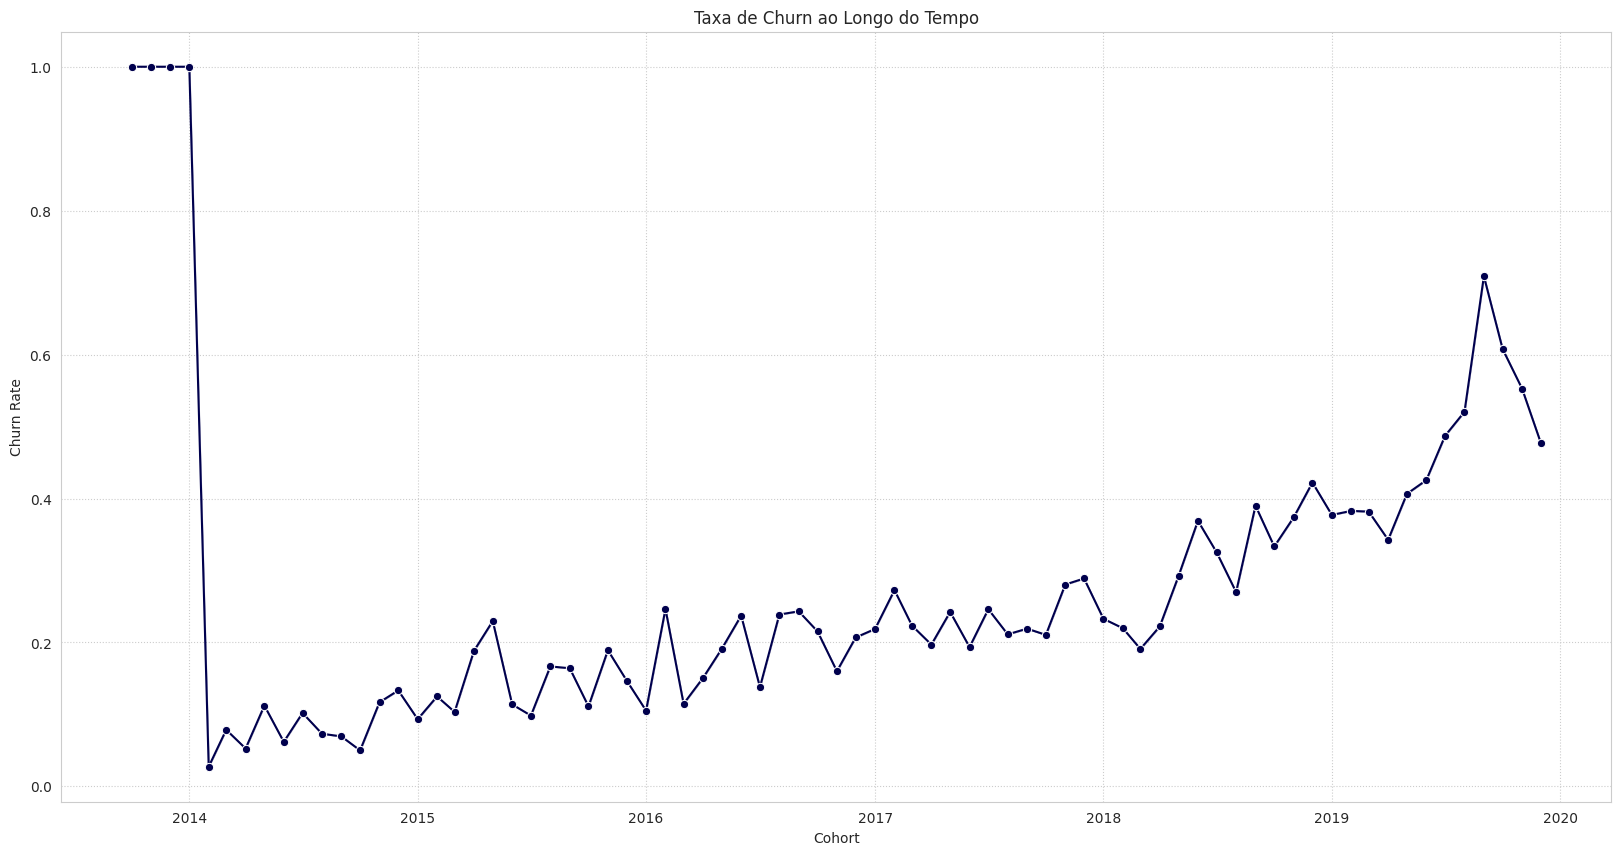

In [75]:
# Gráfico de linha para a taxa de churn ao longo do tempo
plt.figure(figsize=(20, 10))
sns.lineplot(df_churn['churn_rate'], marker='o', linestyle='-')
plt.title('Taxa de Churn ao Longo do Tempo')
plt.xlabel('Cohort')
plt.ylabel('Churn Rate')
plt.show()


* Aparentemente parece haver um padrão de redução da taxa de churn nos primeiros meses de cada cohort seguida e um aumento nos últimos meses.

* No início do contrato, os clientes podem estar mais envolvidos e satisfeitos com os serviços, o que resulta em uma taxa de churn inicialmente baixa. No entanto, à medida que o tempo passa, podem surgir diferentes motivos que levam os clientes a considerar o cancelamento de seus contratos:
    * Insatisfação contínua com a qualidade dos serviços.

    * Problemas recorrentes de conexão

    * Falta de recursos ou benefícios adicionais

    * Aumento dos preços

    * Falta de suporte adequado ao cliente

    * Disponibilidade de ofertas mais atraentes de outras empresas de telecomunicações.

## Feature engineering

### Criando segmentação de clientes com base na interação entre tempo de contrato e gastos

In [76]:
telecom_copy['interaction_contract_monthly'] = telecom_copy['contract_months'] * telecom_copy['monthly_charges']

In [77]:
def customer_segmentation(data, variables, num_clusters):
    # Seleciona apenas as variáveis relevantes para a segmentação
    X = data[variables]

    # Instancia o modelo K-means com o número de clusters desejado
    kmeans = KMeans(n_clusters=num_clusters)

    # Ajusta o modelo aos dados
    kmeans.fit(X)

    # Adiciona os rótulos de cluster em uma nova coluna no dataframe original
    data['cluster_labels'] = kmeans.labels_


    return data

In [78]:
variables = ['interaction_contract_monthly', 'monthly_charges', 'contract_months']

telecom_copy = customer_segmentation(telecom_copy, variables, 3)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


In [79]:
telecom_copy.groupby('cluster_labels')[['interaction_contract_monthly', 'monthly_charges', 'contract_months']].mean()

,interaction_contract_monthly,monthly_charges,contract_months
cluster_labels,,,
0,6472.016024,98.480788,65.875725
1,758.248717,49.638376,19.458051
2,3431.158409,78.469436,45.640016


In [80]:
# Tabela de contingência com as frequências observadas da variável 'churn_class' por cluster
contingency_table = pd.crosstab(telecom_copy['churn_class'], telecom_copy['cluster_labels'])

# Executa o teste qui-quadrado
chi2, p_value, dof, expected = st.chi2_contingency(contingency_table)
alpha = 0.05

print(contingency_table)
print()
print('Resultado do teste qui-quadrado:')
print('Qui-quadrado =', chi2)
print('Valor p =', p_value)
if p_value < alpha:
    print('Há associação entre as variáveis (dependentes)')
else:
    print('Não há associação entre as variáveis(independentes)')

cluster_labels     0     1     2
churn_class                     
0               1038  2883  1253
1                180  1311   378

Resultado do teste qui-quadrado:
Qui-quadrado = 143.80484505868006
Valor p = 5.931638290681498e-32
Há associação entre as variáveis (dependentes)


In [81]:
selected_columns = ['type', 'paperless_billing', 'payment_method', 'gender', 'senior_citizen', 'partner', 'dependents', 'internet_service', 
                    'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines', 'contract_months', 
                    'churn_class']

cluster_df = telecom_copy.groupby('cluster_labels')[selected_columns].apply(lambda x: x.mode().iloc[0])

churned_customers_per_cluster = telecom_copy[telecom_copy['churn_class'] == 1].groupby('cluster_labels')['customer_id'].count()
total_customers_per_cluster = telecom_copy.groupby('cluster_labels')['customer_id'].count()
churn_rate_per_cluster = churned_customers_per_cluster / total_customers_per_cluster

cluster_df['churn_rate'] = churn_rate_per_cluster

# Adicionar informações adicionais
cluster_df['monthly_charges'] = telecom_copy.groupby('cluster_labels')['monthly_charges'].mean()
cluster_df['total_charges'] = telecom_copy.groupby('cluster_labels')['total_charges'].mean()
cluster_df['begin_date'] = telecom_copy.groupby('cluster_labels')['begin_date'].min()
cluster_df['contract_months'] = telecom_copy.groupby('cluster_labels')['contract_months'].mean()
cluster_df['num_customer'] = telecom_copy.groupby('cluster_labels')['customer_id'].count()
cluster_df['estimated_revenue'] = cluster_df['monthly_charges'] * cluster_df['num_customer']
cluster_df['estimated_monthly_revenue'] = cluster_df['estimated_revenue'] / cluster_df['contract_months']

cluster_df = cluster_df.reset_index()

cluster_df

,cluster_labels,type,paperless_billing,payment_method,gender,senior_citizen,partner,dependents,internet_service,online_security,...,multiple_lines,contract_months,churn_class,churn_rate,monthly_charges,total_charges,begin_date,num_customer,estimated_revenue,estimated_monthly_revenue
0,0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,65.875725,0.0,0.147783,98.480788,6338.723112,2013-10-01,1218,119949.60,1820.846747
1,1,0.0,1.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,...,0.0,19.458051,0.0,0.312589,49.638376,692.984680,2014-02-01,4194,208183.35,10699.085331
2,2,0.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,45.640016,0.0,0.231760,78.469436,3328.771429,2013-12-01,1631,127983.65,2804.198163


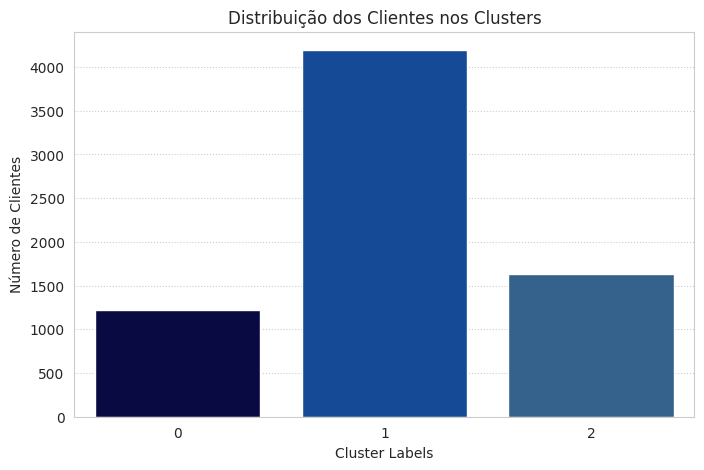

In [82]:
# Contagem de clientes em cada cluster
cluster_counts = telecom_copy['cluster_labels'].value_counts()

# Plot da distribuição dos clusters
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
plt.xlabel('Cluster Labels')
plt.ylabel('Número de Clientes')
plt.title('Distribuição dos Clientes nos Clusters')
plt.show()

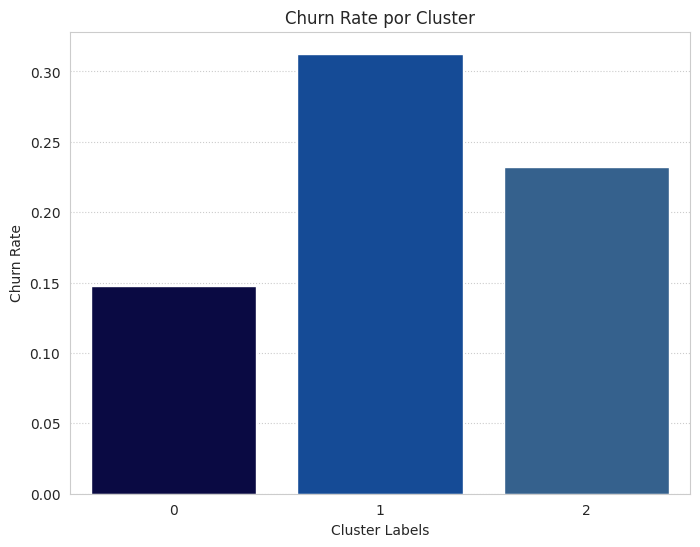

In [83]:
# Calcular a taxa de churn para cada cluster
churn_rate_by_cluster = telecom_copy.groupby('cluster_labels')['churn_class'].mean()

# Criar o gráfico de boxplot para visualizar o churn rate por cluster
plt.figure(figsize=(8, 6))
sns.barplot(x=churn_rate_by_cluster.index, y=churn_rate_by_cluster.values)
plt.xlabel('Cluster Labels')
plt.ylabel('Churn Rate')
plt.title('Churn Rate por Cluster')
plt.show()

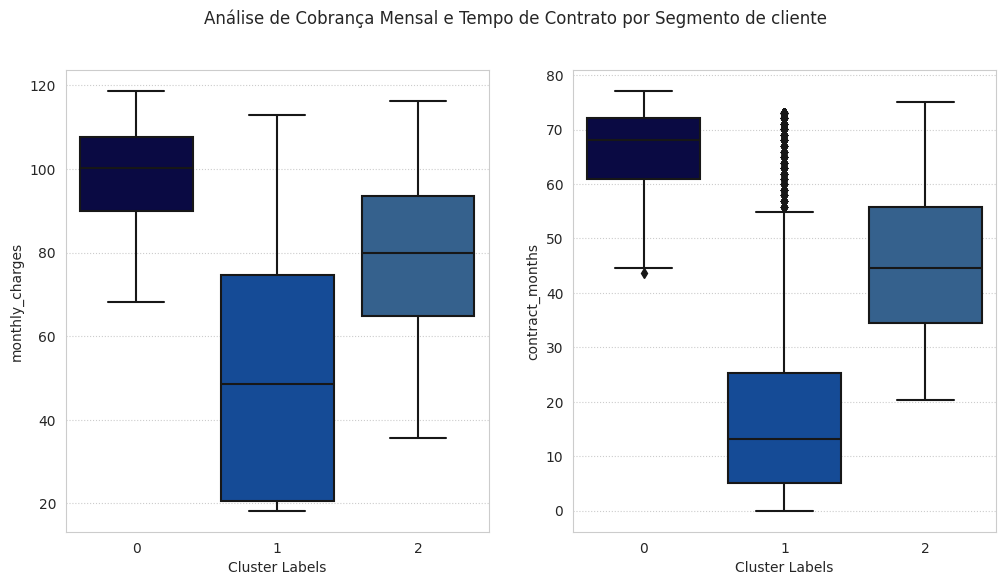

In [84]:
# Selecionar as variáveis relevantes para análise
variables_to_compare = ['monthly_charges', 'contract_months']

# Plot dos boxplots para cada variável em cada cluster
plt.figure(figsize=(12, 6))
for i, var in enumerate(variables_to_compare):
    plt.subplot(1, len(variables_to_compare), i + 1)
    sns.boxplot(x='cluster_labels', y=var, data=telecom_copy)
    plt.xlabel('Cluster Labels')
    plt.ylabel(var)
plt.suptitle('Análise de Cobrança Mensal e Tempo de Contrato por Segmento de cliente')
plt.show()


* A  análise identificou três clusters distintos entre os clientes, cada um exibindo características únicas que podem influenciar a propensão ao churn.

* **Cluster 0 - "Econômicos e Efêmeros":**

    * Este cluster é composto principalmente por clientes com gastos mensais mais baixos e contratos de curto prazo. A maioria dos clientes desse cluster está na categoria de não churn, mas a taxa de churn é mais elevada do que nos outros clusters. Isso sugere que, embora esses clientes não gastem tanto, eles podem ter uma propensão maior a encerrar seus contratos. Estratégias de retenção para este cluster podem envolver ofertas especiais para prolongar contratos e melhorar a qualidade do serviço.

* **Cluster 1 - "Valor Contínuo":**

    * O Cluster 1 representa clientes com gastos mensais mais altos e contratos de longo prazo. Este grupo tem uma taxa de churn mais baixa, indicando uma lealdade significativa. Estratégias para este cluster podem se concentrar em incentivos de longo prazo, programas de fidelidade e serviços premium, aproveitando a disposição desses clientes em investir mais.

* **Cluster 2 - "Intermediário e Estável":**

    * Este cluster apresenta características intermediárias em relação ao gasto mensal e ao tempo de contrato. A taxa de churn é moderada, indicando que esses clientes têm uma propensão razoável ao churn. Estratégias de retenção para este grupo podem envolver abordagens equilibradas, como ofertas personalizadas com base no histórico de uso e comunicação proativa para manter a satisfação.

### Segmentação dos clientes por faixas de gasto mensal

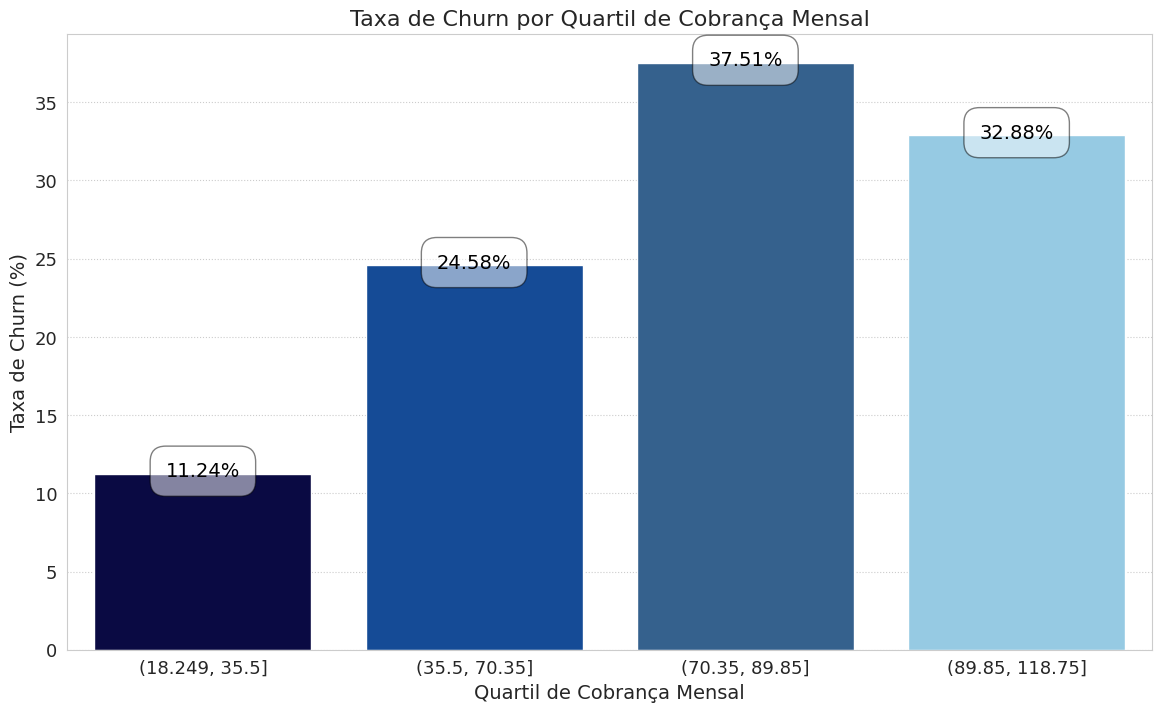

In [85]:
telecom_copy['quartis_monthly_charges'] = pd.qcut(telecom_copy['monthly_charges'], 4)
taxa_churn_quartil = telecom_copy.groupby('quartis_monthly_charges')['churn_class'].mean() * 100

fig, ax = plt.subplots(figsize=(14, 8))
sns.barplot(x=taxa_churn_quartil.index, y=taxa_churn_quartil, ax=ax)
ax.set_xlabel('Quartil de Cobrança Mensal', fontsize=14)
ax.set_ylabel('Taxa de Churn (%)', fontsize=14)
ax.set_title('Taxa de Churn por Quartil de Cobrança Mensal', fontsize=16)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xticks(rotation=0)  
for p, percentage in zip(ax.patches, taxa_churn_quartil):
    height = p.get_height()
    if height > 0:  # Exclude bars with height 0
        ax.annotate(f'{percentage:.2f}%',
                    xytext=(0, 2),
                    textcoords='offset points',
                    xy=(p.get_x() + p.get_width() / 2, height),
                    ha='center',
                    va='center',
                    color='black',
                    fontsize=14,
                    bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.8', alpha=0.5))

plt.show()

In [86]:
quartis_mapping = {
    telecom_copy['quartis_monthly_charges'].unique()[0]: 1,
    telecom_copy['quartis_monthly_charges'].unique()[1]: 2,
    telecom_copy['quartis_monthly_charges'].unique()[2]: 3,
    telecom_copy['quartis_monthly_charges'].unique()[3]: 4
}
telecom_copy['category_monthly_charges'] = telecom_copy['quartis_monthly_charges'].map(quartis_mapping).astype('int')

In [87]:
df_quartil = telecom_copy[telecom_copy['category_monthly_charges'] == 4]

In [88]:
df_quartil

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,...,streaming_tv,streaming_movies,multiple_lines,contract_months,churn_class,num_additional_services,interaction_contract_monthly,cluster_labels,quartis_monthly_charges,category_monthly_charges
5,9305-CDSKC,2019-03-01,2019-11-01,0,1,2,99.65,820.50,0,0,...,1,1,1,11.233333,1,3,1119.401667,1,"(89.85, 118.75]",4
8,7892-POOKP,2017-07-01,2019-11-01,0,1,2,104.80,3046.05,0,0,...,1,1,1,31.500000,1,4,3301.200000,2,"(89.85, 118.75]",4
12,8091-TTVAX,2015-04-01,NaT,1,0,1,100.35,5681.10,1,0,...,1,1,1,58.900000,0,3,5910.615000,0,"(89.85, 118.75]",4
13,0280-XJGEX,2015-09-01,2019-10-01,0,1,0,103.70,5036.30,1,0,...,1,1,1,53.800000,1,4,5579.060000,0,"(89.85, 118.75]",4
14,5129-JLPIS,2018-01-01,NaT,0,1,2,105.50,2686.05,1,0,...,1,1,0,25.366667,0,4,2676.183333,2,"(89.85, 118.75]",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,2014-11-01,NaT,0,1,2,103.50,6479.40,0,1,...,1,1,1,63.933333,0,4,6617.100000,0,"(89.85, 118.75]",4
7025,2823-LKABH,2018-08-01,NaT,0,1,0,95.05,1679.40,0,0,...,0,1,1,18.300000,0,3,1739.415000,1,"(89.85, 118.75]",4
7034,0639-TSIQW,2014-03-01,2019-10-01,0,1,1,102.95,6886.25,0,0,...,1,0,1,72.100000,1,3,7422.695000,0,"(89.85, 118.75]",4
7039,2234-XADUH,2014-02-01,NaT,1,1,1,103.20,7362.90,0,0,...,1,1,1,73.033333,0,4,7537.040000,0,"(89.85, 118.75]",4


In [89]:
telecom_copy.groupby(['category_monthly_charges', 'churn_class'])[col_num].mean()

monthly_charges  total_charges  \
category_monthly_charges churn_class                                   
1                        0                  21.991432     692.482385   
                         1                  24.117172     209.347980   
2                        0                  55.891742    1781.565653   
                         1                  55.230991     642.950346   
3                        0                  80.388616    3157.110428   
                         1                  80.245296    1141.351973   
4                        0                 101.590381    5314.107331   
                         1                  99.487457    3097.378201   

                                      contract_months  
category_monthly_charges churn_class                   
1                        0                  31.578623  
                         1                  10.942088  
2                        0                  31.910736  
                         1                  14.364439  
3                        0                  39.640225  
                         1                  16.858827  
4                        0                  52.508446  
                         1                  33.551730

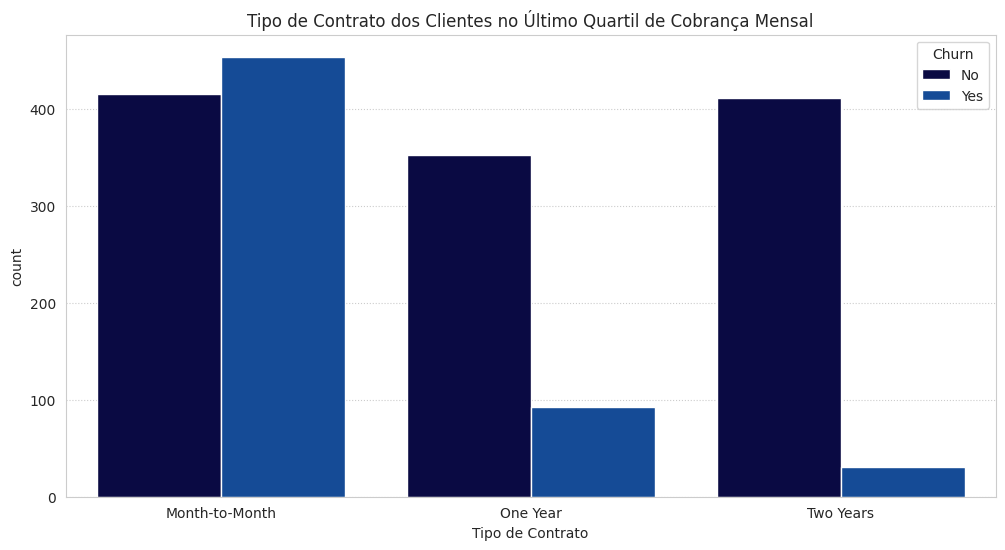

In [90]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df_quartil, x='type', hue='churn_class', ax=ax)
plt.title('Tipo de Contrato dos Clientes no Último Quartil de Cobrança Mensal')
plt.xlabel('Tipo de Contrato')
plt.xticks(ticks=[0, 1, 2], labels=['Month-to-Month', 'One Year', 'Two Years'])
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

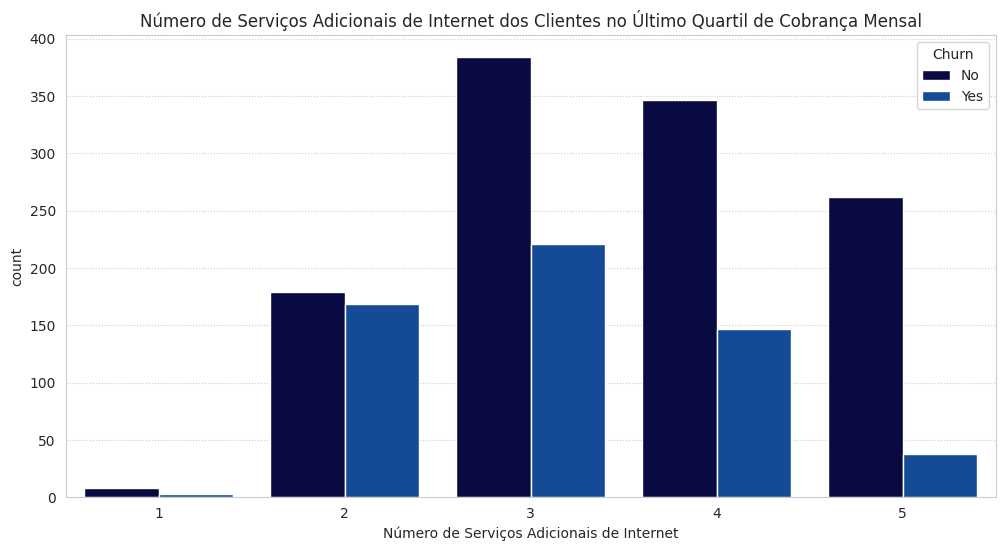

In [91]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(data=df_quartil, x='num_additional_services', hue='churn_class', ax=ax)
plt.title('Número de Serviços Adicionais de Internet dos Clientes no Último Quartil de Cobrança Mensal')
plt.xlabel('Número de Serviços Adicionais de Internet')
plt.legend(title='Churn', labels=['No', 'Yes'])
plt.show()

In [92]:
telecom_copy. drop('quartis_monthly_charges', axis=1, inplace=True)

* **Cobranças Mensais Baixas (1º Quartil: 18,25 a 35,5) - "Estabilidade e Retenção"**
    * A taxa de churn é consideravelmente menor, indicando uma forte retenção. Clientes nesta faixa de cobrança mensal são menos propensos a cancelar seus contratos, sugerindo que o custo mais baixo pode ser um fator positivo para a retenção.

* **Cobranças Mensais Moderadas (2º Quartil: 35,5 a 70,35) - "Variação e Neutralidade"**

    * A taxa de churn é estável, sem grandes variações. Os clientes nesta faixa parecem ter uma taxa de churn média, sem tendências marcantes para retenção ou cancelamento.

* **Cobranças Mensais Moderadamente Altas (3º Quartil: 70,35 a 89,85) - "Desafios de Retenção"**

    * A taxa de churn é mais alta, indicando um desafio na retenção desses clientes. Clientes com cobranças mensais mais altas podem ter expectativas elevadas ou podem ser mais sensíveis a problemas contínuos, levando a uma maior propensão ao churn.

* **Cobranças Mensais Altas (4º Quartil: 89,85 a 118,75) - "Risco Crescente de Churn"**

    * A taxa de churn tem tendência crescente, indicando maior probabilidade de cancelamento. Clientes nesta faixa de cobrança mensal apresentam uma taxa de churn em ascensão, sugerindo que o aumento nos custos pode estar contribuindo para a decisão de cancelar contratos.

* Parece que clientes com cobranças mensais mais altas contratam mais serviços adicionais, mas essa variedade de serviços está associada a uma maior propensão ao cancelamento do contrato (churn). A relação entre o número de serviços adicionais contratados e a taxa de churn mostra um aumento expressivo na taxa de cancelamento à medida que os clientes contratam mais serviços.

## Feature Selection

### Correlação entre variáveis


The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


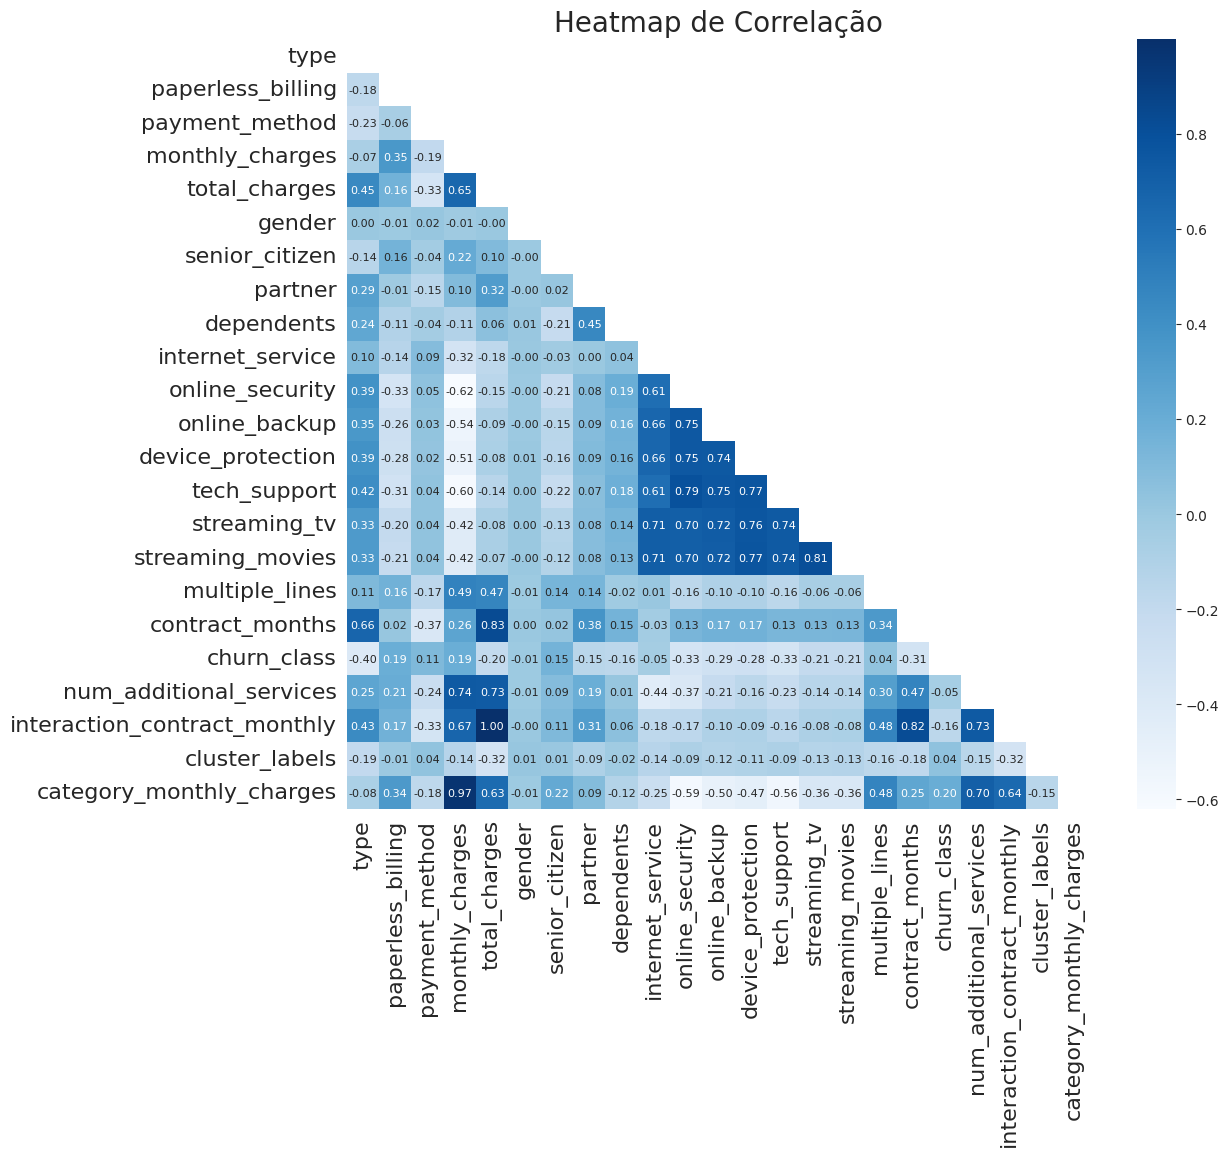

In [93]:
fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(telecom_copy.corr(), dtype=np.bool))
heatmap = sns.heatmap(telecom_copy.corr(), annot=True, fmt=".2f", cmap='Blues', mask=mask, ax=ax, annot_kws={"fontsize": 8})

ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)

plt.title('Heatmap de Correlação', fontsize=20)
plt.show()

### Correlações com o target

In [94]:
# Calcula a correlação entre as variáveis e o target
correlations_with_target = telecom_copy.corrwith(telecom_copy['churn_class'])

# Exibe as correlações com o target
print("Correlação com o Target:")
print(correlations_with_target.sort_values(ascending=False))


Correlação com o Target:
churn_class                     1.000000
category_monthly_charges        0.197139
monthly_charges                 0.193356
paperless_billing               0.191825
senior_citizen                  0.150889
payment_method                  0.107062
cluster_labels                  0.044888
multiple_lines                  0.040102
gender                         -0.008612
internet_service               -0.047291
num_additional_services        -0.051843
partner                        -0.150448
interaction_contract_monthly   -0.162252
dependents                     -0.164221
total_charges                  -0.198324
streaming_tv                   -0.205742
streaming_movies               -0.207256
device_protection              -0.281465
online_backup                  -0.291449
contract_months                -0.311715
tech_support                   -0.329852
online_security                -0.332819
type                           -0.396713
dtype: float64


The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


### Proporção de variaçoes

In [95]:
numeric_columns = telecom_copy.columns[3:]

In [96]:
# Calcula a quantidade de variação (desvio padrão)
variations = np.std(telecom_copy[numeric_columns], axis=0)

# Exibe as variâncias
print("\nVariações:")
print(variations.sort_values(ascending=False))



Variações:
interaction_contract_monthly    2291.120332
total_charges                   2266.633539
monthly_charges                   30.087911
contract_months                   24.551471
num_additional_services            1.631812
category_monthly_charges           1.117842
payment_method                     1.068028
type                               0.833696
online_security                    0.796828
tech_support                       0.795840
device_protection                  0.778771
online_backup                      0.778416
streaming_tv                       0.763158
streaming_movies                   0.761671
internet_service                   0.737744
cluster_labels                     0.633306
gender                             0.499977
partner                            0.499712
multiple_lines                     0.493853
paperless_billing                  0.491422
dependents                         0.458078
churn_class                        0.441530
senior_citizen      

In [97]:
# Escolha um limiar para a variação, por exemplo, 0.1
threshold = 0.1

# Seleciona as features com variação acima do limiar
selected_features = variations[variations > threshold].index.tolist()

# Exibe as principais features selecionadas
print("\nPrincipais Features:")
print(selected_features)



Principais Features:
['type', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges', 'gender', 'senior_citizen', 'partner', 'dependents', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines', 'contract_months', 'churn_class', 'num_additional_services', 'interaction_contract_monthly', 'cluster_labels', 'category_monthly_charges']


### Análise de associações

In [98]:
cols_num_append = ['num_additional_services', 'interaction_contract_monthly']
for col in cols_num_append:
    col_num.append(col)

In [99]:
cols_mult_append = ['cluster_labels', 'category_monthly_charges']
for col in cols_mult_append:
    cat_mult.append(col)

In [100]:
# Classe que tem como módulos os calculos de teste estatístico específico para cada variável 
class StatTests:
    def __init__(self, alpha=0.05):
        self.alpha = alpha

    # Estatística F para determinar se as  variâncias são diferentes ou não
    def f_test(self, group1, group2):
        f = np.var(group1, ddof=1) / np.var(group2, ddof=1)
        nun = group1.size - 1
        dun = group2.size - 1
        p_value = 1 - st.f.cdf(f, nun, dun)
        print(f'valor p: {p_value}')
        if p_value < self.alpha:
            return 'As variâncias são diferentes'
        else:
            return 'As variâncias não são diferentes'

    # Teste t  para amostras independentes para variáveis independentes 
    # Cada variável tem >30 observações
    # O parâmetro equal_var tem como padrão True, mas é possível mudar caso 
    # a estatśtica f resulte em variâncias diferentes
    def t_test(self, group1, group2, equal_var=True):
        t, p_value = st.ttest_ind(group1, group2, equal_var=equal_var)
        print(f'Teste T: {t}, valor p: {p_value}')
        if p_value < self.alpha:
            return 'As médias são diferentes'
        else:
            return 'As médias não são diferentes'

    # Teste qui-quadrado para associação entre variáveis categoricas
    def chi2_test(self, group1, group2):
        contingency_table = pd.crosstab(group1, group2)
        chi2, p_value, _, _ = st.chi2_contingency(contingency_table)
        if p_value < self.alpha:
            return 'Há associação entre as variáveis (dependentes)'
        else:
            return 'Não há associação entre as variáveis(independentes)'

In [101]:
# Setando o valor de alpha 5%
alpha = 0.05
# Instanciando a classe
data = StatTests(alpha)

In [102]:
cat_num_test = col_num

grupo1 = telecom_copy['churn_class']

In [103]:
for var in col_num:
    grupo2 = telecom_copy[var]
    u_result = data.f_test(grupo1, grupo2)
    print(f"Variável: {var}")
    print(f"Resultado: {u_result}")
    print()

valor p: 1.0
Variável: monthly_charges
Resultado: As variâncias não são diferentes

valor p: 1.0
Variável: total_charges
Resultado: As variâncias não são diferentes

valor p: 1.0
Variável: contract_months
Resultado: As variâncias não são diferentes

valor p: 1.0
Variável: num_additional_services
Resultado: As variâncias não são diferentes

valor p: 1.0
Variável: interaction_contract_monthly
Resultado: As variâncias não são diferentes



In [104]:
for var in col_num:
    grupo2 = telecom_copy[var]
    t_result = data.t_test(grupo1, grupo2)
    print(f"Variável: {var}")
    print(f"Resultado: {t_result}")
    print()


Teste T: -179.8639691593982, valor p: 0.0
Variável: monthly_charges
Resultado: As médias são diferentes

Teste T: -84.39182315053061, valor p: 0.0
Variável: total_charges
Resultado: As médias são diferentes

Teste T: -113.74316967392309, valor p: 0.0
Variável: contract_months
Resultado: As médias são diferentes

Teste T: -73.75928771124346, valor p: 0.0
Variável: num_additional_services
Resultado: As médias são diferentes

Teste T: -86.6260701004454, valor p: 0.0
Variável: interaction_contract_monthly
Resultado: As médias são diferentes



In [105]:
for var in cat_mult:
    grupo2 = telecom_copy[var]
    chi2_result = data.chi2_test(grupo1, grupo2)
    print(f"Variável: {var}")
    print(f"Resultado do teste qui-quadrado: {chi2_result}")
    print()

Variável: type
Resultado do teste qui-quadrado: Há associação entre as variáveis (dependentes)

Variável: payment_method
Resultado do teste qui-quadrado: Há associação entre as variáveis (dependentes)

Variável: internet_service
Resultado do teste qui-quadrado: Há associação entre as variáveis (dependentes)

Variável: online_security
Resultado do teste qui-quadrado: Há associação entre as variáveis (dependentes)

Variável: online_backup
Resultado do teste qui-quadrado: Há associação entre as variáveis (dependentes)

Variável: device_protection
Resultado do teste qui-quadrado: Há associação entre as variáveis (dependentes)

Variável: tech_support
Resultado do teste qui-quadrado: Há associação entre as variáveis (dependentes)

Variável: streaming_tv
Resultado do teste qui-quadrado: Há associação entre as variáveis (dependentes)

Variável: streaming_movies
Resultado do teste qui-quadrado: Há associação entre as variáveis (dependentes)

Variável: cluster_labels
Resultado do teste qui-quadr

In [106]:
for var in cat_bin:
    grupo2 = telecom_copy[var]
    chi2_result = data.chi2_test(grupo1, grupo2)
    print(f"Variável: {var}")
    print(f"Resultado do teste qui-quadrado: {chi2_result}")
    print()

Variável: paperless_billing
Resultado do teste qui-quadrado: Há associação entre as variáveis (dependentes)

Variável: gender
Resultado do teste qui-quadrado: Não há associação entre as variáveis(independentes)

Variável: partner
Resultado do teste qui-quadrado: Há associação entre as variáveis (dependentes)

Variável: dependents
Resultado do teste qui-quadrado: Há associação entre as variáveis (dependentes)

Variável: multiple_lines
Resultado do teste qui-quadrado: Há associação entre as variáveis (dependentes)

Variável: senior_citizen
Resultado do teste qui-quadrado: Há associação entre as variáveis (dependentes)

Variável: churn_class
Resultado do teste qui-quadrado: Há associação entre as variáveis (dependentes)




### Análise dos resultados:


* **Heatmap de Correlação entre Variáveis:**

    * As correlações acima de 0.6 indicam fortes relações lineares entre as variáveis. Isso pode sugerir multicolinearidade, o que pode afetar a interpretação do modelo.
    * As variáveis com correlções fortes foram:
        * monthly_charges com total_charges, num_additional_services, entre outros.
        * total_charges com contract_months, num_additional_services, entre outros.
        * As várias variáveis relacionadas aos serviços online.


*   **Correlação com o Target:**

    * A correlação com o target (churn_class) mostra quais variáveis têm uma relação mais forte com o churn. Variáveis como type, online_security, tech_support, device_protection, online_backup têm correlações significativas e podem ser potencialmente importantes para prever a churn.

* **Análise de Variação:**

    * A análise de variação indica as características que têm variação significativa. Variáveis como interaction_contract_monthly, total_charges, e monthly_charges têm variações relativamente altas. 

* **Teste T e Qui-Quadrado:**

    * Os testes t indicam diferenças significativas nas médias de várias variáveis entre grupos. O teste qui-quadrado mostra associação significativa entre várias variáveis categóricas e o churn.
    

### Próximos passos:

* Com base nas correlações, associações e variações, irei considerar as seguintes features como potencialmente importantes para o modelo:
    * monthly_charges, total_charges, num_additional_services, category_monthly_charges, internet_service, online_security, tech_support, device_protection, streaming_tv, streaming_movies, contract_months, interaction_contract_monthly, cluster_labels, type.



In [107]:
telecom_model = telecom_copy[['churn_class', 'monthly_charges', 'total_charges', 'num_additional_services', 'category_monthly_charges', 'internet_service', 'online_security', 'tech_support', 'device_protection', 'streaming_tv', 'streaming_movies', 'contract_months', 'interaction_contract_monthly', 'cluster_labels', 'type']]

## Modelagem

In [108]:
def split_data(data):
    # Divisão inicial em treinamento e validação
    X_train, X_val, y_train, y_val = train_test_split(data.drop('churn_class', axis=1), data['churn_class'], test_size=0.2, random_state=42)
    
    # Divide o restante em validação e teste
    X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)
    
    return X_train, X_val, X_test, y_train, y_val, y_test


In [109]:
def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

In [110]:
def bootstrap_evaluation_adasyn(model, param_grid, X_train, y_train, X_val, y_val, n_iterations=20):
    all_results = {'accuracy_list': [], 'f1_score_list': [], 'precision_list': [], 'recall_list': [], 'auc_roc_list': [],
                   'conf_matrices': [], 'roc_curves': []}

    for _ in tqdm(range(n_iterations), desc=f'Evaluating {model.__class__.__name__}'):
        indices = np.random.choice(len(X_train), size=len(X_train), replace=True)
        X_train_bootstrapped = X_train.iloc[indices]
        y_train_bootstrapped = y_train.iloc[indices]

        col_num = X_train.select_dtypes(include=np.number).columns.tolist()
        preprocessor = ColumnTransformer(transformers=[('numerical', StandardScaler(), col_num)])
        
        pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('ADASYN', ADASYN(random_state=42)),
            ('classifier', model)
        ])

        random_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1)
        random_search.fit(X_train_bootstrapped, y_train_bootstrapped)

        best_model = random_search.best_estimator_
        y_pred = best_model.predict(X_val)

        all_results['accuracy_list'].append(accuracy_score(y_val, y_pred))
        all_results['f1_score_list'].append(f1_score(y_val, y_pred))
        all_results['precision_list'].append(precision_score(y_val, y_pred))
        all_results['recall_list'].append(recall_score(y_val, y_pred))
        all_results['auc_roc_list'].append(roc_auc_score(y_val, y_pred))
        all_results['conf_matrices'].append(confusion_matrix(y_val, y_pred))

        fpr, tpr, _ = roc_curve(y_val, y_pred)
        roc_auc = auc(fpr, tpr)
        all_results['roc_curves'].append((fpr, tpr, roc_auc))

    return {
        'all_results': all_results,
        'best_params': random_search.best_params_
    }



In [111]:
def evaluate_models(models, X_train, y_train, X_val, y_val):
    model_names = []
    results = []

    for model_name, model, param_grid in models:
        result = bootstrap_evaluation_adasyn(model, param_grid, X_train, y_train, X_val, y_val)
        model_names.append(model_name)
        results.append(result)

    return model_names, results

In [112]:
def display_results(model_names, results):
    df_dict = {'Model': [], 'Accuracy ± sd': [], 'F1 Score ± sd': [], 'Precision ± sd': [], 'Recall ± sd': [], 'AUC ROC ± sd': []}
    all_roc_data = []

    for model_name, result in zip(model_names, results):
        all_results = result['all_results']

        df_dict['Model'].append(model_name)
        df_dict['Accuracy ± sd'].append((round(np.mean(all_results['accuracy_list']), 2), round(np.std(all_results['accuracy_list']), 2)))
        df_dict['Precision ± sd'].append((round(np.mean(all_results['precision_list']), 2), round(np.std(all_results['precision_list']), 2)))
        df_dict['Recall ± sd'].append((round(np.mean(all_results['recall_list']), 2), round(np.std(all_results['recall_list']), 2)))
        df_dict['F1 Score ± sd'].append((round(np.mean(all_results['f1_score_list']), 2), round(np.std(all_results['f1_score_list']), 2)))
        df_dict['AUC ROC ± sd'].append((round(np.mean(all_results['auc_roc_list']), 2), round(np.std(all_results['auc_roc_list']), 2)))

        print(f"\n Model: {model_name}")
        print("Best Parameters:")
        for param, value in result['best_params'].items():
            print(f"{param}: {value}")
        print()

        # Display confusion matrix as a table
        avg_conf_matrix = np.mean(all_results['conf_matrices'], axis=0)
        confusion_df = pd.DataFrame(avg_conf_matrix, columns=['Predicted 0', 'Predicted 1'], index=['Actual 0', 'Actual 1'])
        print("Confusion Matrix:")
        print(confusion_df)
        print()

        # Collect ROC data for later plotting
        all_roc_data.append({
            'model_name': model_name,
            'fpr': np.mean([curve[0] for curve in all_results['roc_curves']], axis=0),
            'tpr': np.mean([curve[1] for curve in all_results['roc_curves']], axis=0),
            'roc_auc': np.mean([curve[2] for curve in all_results['roc_curves']])
        })

    results_df = pd.DataFrame(df_dict)
    print(results_df.to_string(index=False))  # Print the results without row indices

   # Plot all ROC curves together
    plt.figure(figsize=(8, 8))

    # Escolhendo a paleta de cores semelhante à 'winter'
    palette = sns.color_palette("winter", n_colors=len(all_roc_data))

    for i, roc_data in enumerate(all_roc_data):
        plt.plot(roc_data['fpr'], roc_data['tpr'], label=f"{roc_data['model_name']} (AUC = {roc_data['roc_auc']:.2f})", color=palette[i])

    plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - All Models')
    plt.legend()
    plt.show()



In [113]:
X_train, X_val, X_test, y_train, y_val, y_test= split_data(telecom_model)

Evaluating LogisticRegression: 100%|██████████| 20/20 [00:58<00:00,  2.94s/it]



 Model: DecisionTreeClassifier
Best Parameters:
classifier__max_depth: 16

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0       418.35        98.65
Actual 1        37.30       149.70


 Model: RandomForestClassifier
Best Parameters:
classifier__max_depth: 10
classifier__n_estimators: 10

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0       398.95       118.05
Actual 1        30.40       156.60


 Model: XGBClassifier
Best Parameters:
classifier__learning_rate: 1
classifier__max_depth: 9
classifier__n_estimators: 20

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0       479.60        37.40
Actual 1        32.95       154.05


 Model: CatBoostClassifier
Best Parameters:
classifier__depth: 9
classifier__learning_rate: 1
classifier__n_estimators: 30

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0       456.55        60.45
Actual 1        34.10       152.90


 Model: LogisticRegression
Best Parameters:
classifier__C: 1
classifier__

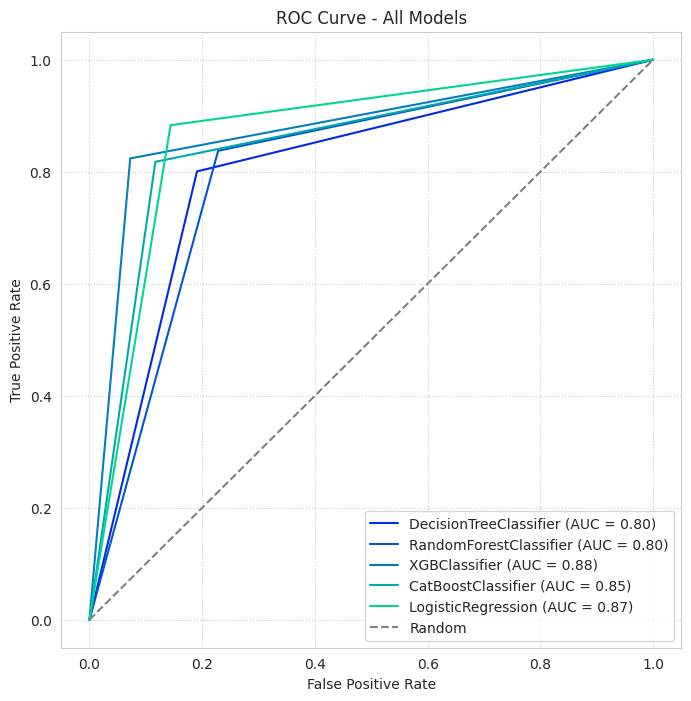

In [114]:
models = [
    ('DecisionTreeClassifier', DecisionTreeClassifier(), {'classifier__max_depth': [1, 8, 16]}),
    ('RandomForestClassifier', RandomForestClassifier(), {'classifier__n_estimators': [10, 20, 60], 'classifier__max_depth': [1, 10]}),
    ('XGBClassifier', xgb.XGBClassifier(), {'classifier__learning_rate': [0.1, 0.01, 1], 'classifier__max_depth': [2, 9, 10], 'classifier__n_estimators': [5, 10, 20]}),
    ('CatBoostClassifier', CatBoostClassifier(verbose=0), {'classifier__learning_rate': [0.1, 0.01, 1], 'classifier__depth': [5, 7, 9], 'classifier__n_estimators': [10, 30]}),
    ('LogisticRegression', LogisticRegression(), {'classifier__C': [0.1, 0.01, 1], 'classifier__solver': ['liblinear', 'lbfgs', 'saga']})
]

model_names, results = evaluate_models(models, X_train, y_train, X_val, y_val)

display_results(model_names, results)

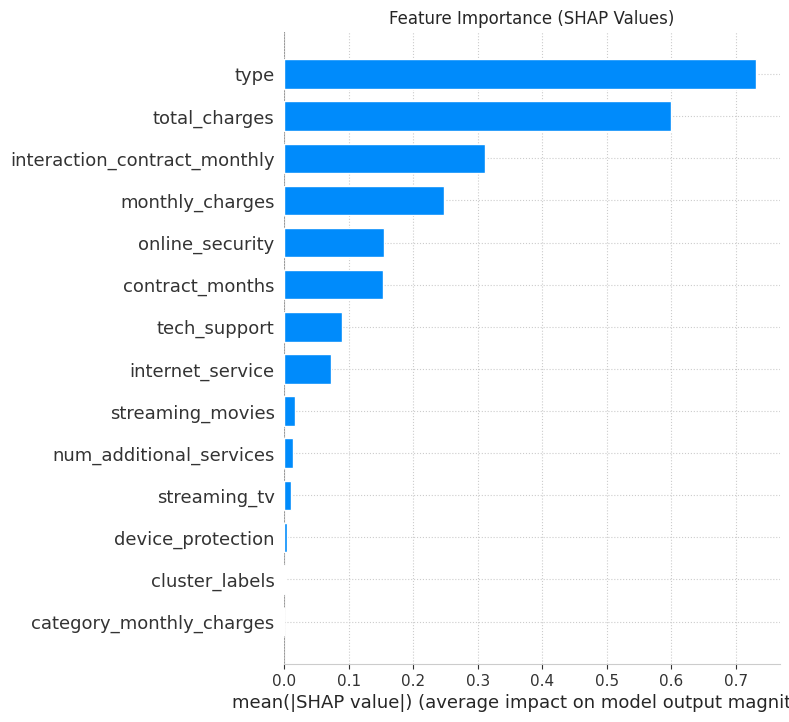

In [115]:
# Treinar o XGBClassifier no conjunto de treinamento completo
best_model = xgb.XGBClassifier(learning_rate=0.1, max_depth=10, n_estimators=20)  # Defina os hiperparâmetros com base na tabela de resultados
best_model.fit(X_train, y_train)

# Criar um shap.Explainer para modelos em arvore para o modelo treinado
explainer = shap.TreeExplainer(best_model)

# Calcular os SHAP values para o conjunto de teste
shap_values = explainer.shap_values(X_test)

# Visualizar a importância das features usando o SHAP
shap.summary_plot(shap_values, X_test, plot_type='bar', show=False)

# Exibir o plot
plt.title('Feature Importance (SHAP Values)')
plt.show()


In [116]:
# Prever os rótulos do conjunto de teste
y_pred = best_model.predict(X_test)

# Calcular os erros do modelo
errors = y_pred != y_test

# Adicionar a coluna de erros ao DataFrame de teste
df_test = X_test.copy()
df_test['erro'] = errors

# Calcular a média do erro por segmento (se houver uma coluna 'segmento' no DataFrame)
mean_error_by_segment = df_test.groupby('cluster_labels')['erro'].mean()*100

# Exibir a média do erro por segmento
for segment, mean_error in mean_error_by_segment.items():
    print(f'Segmento {segment}: {mean_error:.2f}%')

Segmento 0: 9.32%
Segmento 1: 7.16%
Segmento 2: 17.26%


In [117]:
# Prever as probabilidades de previsão do modelo
y_probs = best_model.predict_proba(X_test)[:, 1]
df_test['prob'] = y_probs


mean_prob = df_test['prob'].mean()
mean_prob_cluster = df_test.groupby('cluster_labels')['prob'].mean()*100

for segment, mean_prob in mean_prob_cluster.items():
    print(f'Segmento {segment}: {mean_prob:.2f}%')


Segmento 0: 17.95%
Segmento 1: 34.17%
Segmento 2: 26.47%


* Considerando as métricas de avaliação, o modelo XGBClassifier com os seguintes hiperparâmetros ('learning_rate': 1, 'max_depth': 10, 'n_estimators': 20) apresenta um desempenho geral superior aos demais modelos. Ele possui alta acurácia (Accuracy = 0,85) um bom equilíbrio entre sensibilidade e precisão (F1-Score = 0,71) e uma alta capacidade de distinguir corretamente entre as classes positivas e negativas (AUC-ROC = 0,80).

* O modelo de escolha será o XGBoost (XGBClassifier), pois:
    * Demonstrou excelente desempenho em termos de precisão, recall e AUC ROC.
    * Possui capacidade de lidar eficazmente com relações não lineares.
    * Geralmente é um modelo mais robusto e alta versatilidade.


* Os resultados do Shapley Additive Explanations mostra o impacto das variáveis em suas previsões de modelo. As importâncias relativas das features identificadas:

    * **Type**: Parece que o tipo de contrato tem uma grande influência nas previsões do modelo. Isso faz sentido, pois diferentes tipos de contratos podem ter implicações significativas no comportamento do cliente em relação ao churn.

    * **Total Charges**: O valor total gasto pelos clientes parece ser uma variável importante. É esperado que clientes com gastos mais altos possam ter um impacto diferente em relação ao churn em comparação com aqueles com gastos mais baixos.

    * **Interaction Contract Monthly:** A interação entre o tipo de contrato e os gastos mensais sugere que a dinâmica entre esses dois fatores é relevante para prever o churn.

    * **Monthly Charges (Gasto Mensal):** O valor mensal que os clientes estão dispostos a pagar também desempenha um papel importante. Clientes com gastos mensais mais altos podem ter uma probabilidade diferente de churn em comparação com aqueles com gastos mensais mais baixos.

    * **Online Security e Tech Support:** Serviços de segurança online e suporte técnico parecem ser relevantes. Isso sugere que a presença ou ausência desses serviços pode impactar a probabilidade de churn.

    * **Contract Months (Tempo de Contrato em Meses):** O tempo de contrato em meses também é um fator significativo. Contratos de longo prazo podem influenciar positivamente na retenção de clientes.

    * **Internet Service e Streaming Movies:** A qualidade do serviço de internet e a disponibilidade de serviços como streaming de filmes também são fatores importantes a serem considerados. Clientes que utilizam esses serviços podem ter uma propensão diferente ao churn.
    
    * **Num Additional Services (Número de Serviços Adicionais de Internet):** A presença de serviços adicionais de internet parece ter uma influência na previsão de churn. Clientes que utilizam mais serviços adicionais podem ter comportamentos distintos.


* Sobre a Média de Erro do Modelo por Segmento:

    * **Segmento 0 (7.16%):** Este segmento tem a menor média de erro, indicando que o modelo tem uma boa capacidade de prever corretamente as classes para este grupo. A taxa de erro de 7.16% sugere uma boa precisão nas previsões.
    * **Segmento 1 (9.32%):** O segundo menor erro médio é observado no Segmento 1. Embora ligeiramente maior do que o Segmento 0, a taxa de erro de 9.32% ainda é aceitável, indicando uma performance consistente do modelo nesse grupo.
    * **Segmento 2 (17.26%):** Este segmento apresenta a maior taxa média de erro, indicando que o modelo pode ter mais dificuldade em fazer previsões precisas para os membros deste grupo. Pode ser útil investigar as características específicas deste segmento para entender melhor as razões por trás da taxa de erro mais alta.

* Sobre a Média da Probabilidade de Churn por Segmento:

    * **Segmento 0 (34.17%):** Este segmento possui a maior média de probabilidade de churn, indicando que os clientes neste grupo têm, em média, uma probabilidade relativamente alta de churn. Isso pode sugerir uma maior atenção ou ações de retenção específicas para esse segmento.
    * **Segmento 1 (17.95%):** A média de probabilidade de churn para o Segmento 1 é menor do que a do Segmento 0, indicando um menor risco de churn para os clientes neste grupo. No entanto, ainda é significativo, e estratégias de retenção podem ser aplicadas de forma seletiva.
    * **Segmento 2 (26.47%)**: Este segmento apresenta uma média intermediária de probabilidade de churn. Embora menor que o Segmento 0, a probabilidade ainda é substancial, sugerindo que ações de retenção podem ser relevantes para este grupo.

## Conclusões e Propostas de Mudanças

* A análise por clusters identificou três grupos distintos com características únicas. Estratégias de retenção personalizadas são sugeridas para cada cluster: foco em ofertas especiais para o Cluster 0, incentivos de longo prazo para o Cluster 1 e abordagens equilibradas para o Cluster 2.

* A análise dos quartis de cobrança mensal mostra que clientes com cobranças mais baixas têm uma taxa de churn menor, enquanto aqueles com cobranças mais altas apresentam uma tendência crescente de churn.

* A análise sobre os serviços adicionais mostra que quanto mais serviços contratados menor é a taxa de churn dos clientes, entretanto, clientes no último quartil de cobrança mensal que contratam mais serviços adicionais de internet têm maior taxa de churn, sugerindo que serviços adicionais pode não estar satisfazendo esses clientes, ou podem não ser específicos para as necessidades dos mesmos.

* O modelo XGBoost se destacou com um desempenho superior, considerando acurácia, F1-Score e AUC-ROC. As features mais impactantes incluem tipo de contrato, gastos totais, interação entre tipo de contrato e gastos mensais, gasto mensal, segurança online, suporte técnico, tempo de contrato, serviço de internet e streaming de filmes, e número de serviços adicionais de internet.

* A análise por segmentos mostrou que o modelo tem uma boa capacidade de prever corretamente as classes para a maioria dos grupos, com taxas de erro aceitáveis. A média da probabilidade de churn por segmento destaca a necessidade de estratégias específicas para cada grupo, com maior atenção para o Segmento 0, que apresenta a maior probabilidade média de churn.

Propostas para Reter Clientes:

* **Estratégias de Retenção Diferenciadas por Cluster:** Implementar estratégias personalizadas para cada cluster, considerando as características específicas de gastos e tempo de contrato de cada grupo. Ofertas especiais, programas de fidelidade e comunicação proativa podem ser aplicados de maneira seletiva.

* **Pesquisa de Satisfação:** Colher opinião dos clientes sobre os serviços contratados. Analisar o motivo de cancelamento dos contratos.

* **Ofertas Especiais para Gastos Mensais Altos:** Desenvolver ofertas especiais para clientes com cobranças mensais mais altas, buscando reduzir a tendência de churn nesse grupo. Descontos, pacotes premium ou serviços adicionais podem ser considerados.

* **Incentivos de Longo Prazo para Clientes Leais:** Para clientes com contratos de longo prazo e gastos mais altos, criar programas de incentivo de longo prazo, como descontos progressivos, acesso a serviços exclusivos ou upgrades gratuitos.

* **Promoções para Clientes com Menos Serviços Adicionais:** Identificar clientes com menos serviços adicionais de internet e oferecer promoções para incentivar a contratação de mais serviços. Isso pode ser uma estratégia eficaz com base na correlação identificada entre serviços adicionais e taxa de churn.

* **Monitoramento Contínuo da Taxa de Churn por Segmento:** Manter um monitoramento contínuo da taxa de churn por segmento, ajustando as estratégias de retenção conforme necessário. Isso permitirá uma abordagem ágil e adaptativa para reter clientes de maneira eficaz.

* **Análise Detalhada do Segmento de Maior Risco:** Realizar uma análise mais aprofundada do Segmento 0, que apresenta a maior probabilidade média de churn. Identificar as principais razões por trás desse comportamento e desenvolver soluções específicas para mitigar o risco.

* **Investir em Melhoria de Serviços Específicos:** Avaliar as características de segurança online, suporte técnico, serviço de internet e streaming de filmes. Investir em melhorias nessas áreas pode contribuir para uma maior satisfação do cliente e redução do churn.